<a href="https://colab.research.google.com/github/Amitgm/Customer_segmentation_k_means_and_DBSCAN/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Required packages

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [2]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Online_Retail.zip
!unzip -qq Online_Retail.zip

## Load the data

In [3]:
# YOUR CODE HERE
train_data = pd.read_csv("Online_Retail_Train.csv")
train_data.head()

InvoiceNo StockCode                         Description  Quantity  \
0    579427     22636  CHILDS BREAKFAST SET CIRCUS PARADE         2   
1    554092     21916     SET 12 RETRO WHITE CHALK STICKS        24   
2    577774     84692         BOX OF 24 COCKTAIL PARASOLS         6   
3   C571196     23350             ROLL WRAP VINTAGE SPOT        -12   
4    546649    84509a     SET OF 4 ENGLISH ROSE PLACEMATS         1   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2011-11-29 13:04:00       8.50     16479.0  United Kingdom  
1  2011-05-22 12:41:00       0.42     17176.0  United Kingdom  
2  2011-11-21 15:57:00       0.42     16712.0  United Kingdom  
3  2011-10-14 12:02:00       1.25         NaN  United Kingdom  
4  2011-03-15 14:17:00       7.46         NaN  United Kingdom

In [4]:
test_data = pd.read_csv("Online_Retail_Test.csv")
test_data.head()

InvoiceNo StockCode                       Description  Quantity  \
0    555200     71459    HANGING JAM JAR T-LIGHT HOLDER        24   
1    554974     21128                GOLD FISHING GNOME         4   
2    550972     21086       SET/6 RED SPOTTY PAPER CUPS         4   
3    576652     22812  PACK 3 BOXES CHRISTMAS PANETTONE         3   
4    546157     22180                    RETROSPOT LAMP         2   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2011-06-01 12:05:00       0.85     17315.0  United Kingdom  
1  2011-05-27 17:14:00       6.95     14031.0  United Kingdom  
2  2011-04-21 17:05:00       0.65     14031.0  United Kingdom  
3  2011-11-16 10:39:00       1.95     17198.0  United Kingdom  
4  2011-03-10 08:40:00       9.95     13502.0  United Kingdom

#### Inspect the data

In [5]:
# YOUR CODE HERE
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514813 entries, 0 to 514812
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    514813 non-null  object 
 1   StockCode    514813 non-null  object 
 2   Description  513428 non-null  object 
 3   Quantity     514813 non-null  int64  
 4   InvoiceDate  514813 non-null  object 
 5   UnitPrice    514813 non-null  float64
 6   CustomerID   386550 non-null  float64
 7   Country      514813 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 31.4+ MB


In [6]:
train_data.shape

(514813, 8)

#### Checking all the null values

In [7]:
train_data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1385
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     128263
Country             0
dtype: int64

In [8]:
test_data.isna().sum()

InvoiceNo         0
StockCode         0
Description      69
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     6817
Country           0
dtype: int64

##### Checking all the duplicates in the rows

In [9]:
train_data[train_data.duplicated(keep=False)].sort_values(by=train_data.columns.to_list()).head(10)

InvoiceNo StockCode                       Description  Quantity  \
5971      536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
106410    536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
7680      536409     22111      SCOTTIE DOG HOT WATER BOTTLE         1   
337541    536409     22111      SCOTTIE DOG HOT WATER BOTTLE         1   
308093    536409     22866     HAND WARMER SCOTTY DOG DESIGN         1   
328039    536409     22866     HAND WARMER SCOTTY DOG DESIGN         1   
8281      536409     22900   SET 2 TEA TOWELS I LOVE LONDON          1   
487626    536409     22900   SET 2 TEA TOWELS I LOVE LONDON          1   
6700      536412     21448         12 DAISY PEGS IN WOOD BOX         2   
38206     536412     21448         12 DAISY PEGS IN WOOD BOX         2   

                InvoiceDate  UnitPrice  CustomerID         Country  
5971    2010-12-01 11:45:00       1.25     17908.0  United Kingdom  
106410  2010-12-01 11:45:00       1.25     17908.0  United Kingdom  
7680    2010-12-01 11:45:00       4.95     17908.0  United Kingdom  
337541  2010-12-01 11:45:00       4.95     17908.0  United Kingdom  
308093  2010-12-01 11:45:00       2.10     17908.0  United Kingdom  
328039  2010-12-01 11:45:00       2.10     17908.0  United Kingdom  
8281    2010-12-01 11:45:00       2.95     17908.0  United Kingdom  
487626  2010-12-01 11:45:00       2.95     17908.0  United Kingdom  
6700    2010-12-01 11:49:00       1.65     17920.0  United Kingdom  
38206   2010-12-01 11:49:00       1.65     17920.0  United Kingdom

In [10]:
train_data[train_data.duplicated(keep=False)].sort_values(by=train_data.columns.to_list()).shape

(9168, 8)

#### Identifying all the orders starting with A or C

In [11]:
train_data[train_data["InvoiceNo"].str.startswith(("A","C"))].head(2)

InvoiceNo StockCode                   Description  Quantity  \
3    C571196     23350       ROLL WRAP VINTAGE SPOT        -12   
34   C578367     22759  SET OF 3 NOTEBOOKS IN PARCEL       -12   

            InvoiceDate  UnitPrice  CustomerID         Country  
3   2011-10-14 12:02:00       1.25         NaN  United Kingdom  
34  2011-11-24 11:00:00       1.65     14640.0  United Kingdom

#### Checking all the irrelvant stock codes in the list

In [12]:
stockcodelist = ['POST' 'PADS' 'M' 'DOT' 'C2' 'BANK CHARGES']

In [13]:
train_data[train_data["StockCode"].str.startswith(("POST","PADS","M","DOT","C2","BANK CHARGES"))]

InvoiceNo StockCode     Description  Quantity          InvoiceDate  \
230       565840       DOT  DOTCOM POSTAGE         1  2011-09-07 12:02:00   
593       537642       DOT  DOTCOM POSTAGE         1  2010-12-07 15:33:00   
985       571187      POST         POSTAGE         3  2011-10-14 11:39:00   
1141      536862       DOT  DOTCOM POSTAGE         1  2010-12-03 11:13:00   
1248      556428       DOT  DOTCOM POSTAGE         1  2011-06-10 13:23:00   
...          ...       ...             ...       ...                  ...   
513746   C567682         M          Manual       -13  2011-09-21 16:28:00   
514085    580612       DOT  DOTCOM POSTAGE         1  2011-12-05 11:58:00   
514131    550957         M          Manual         1  2011-04-21 16:37:00   
514175    559518       DOT  DOTCOM POSTAGE         1  2011-07-08 16:11:00   
514700   C546870         M          Manual        -2  2011-03-17 16:07:00   

        UnitPrice  CustomerID         Country  
230        203.73         NaN  United Kingdom  
593        448.00         NaN  United Kingdom  
985         18.00     12380.0         Belgium  
1141       254.43         NaN  United Kingdom  
1248       130.71         NaN  United Kingdom  
...           ...         ...             ...  
513746       0.79     17997.0  United Kingdom  
514085    2114.00         NaN  United Kingdom  
514131       1.95     18283.0  United Kingdom  
514175      92.88         NaN  United Kingdom  
514700       2.50     14462.0  United Kingdom  

[2585 rows x 8 columns]

#### Checking all the outliers present in the dataset

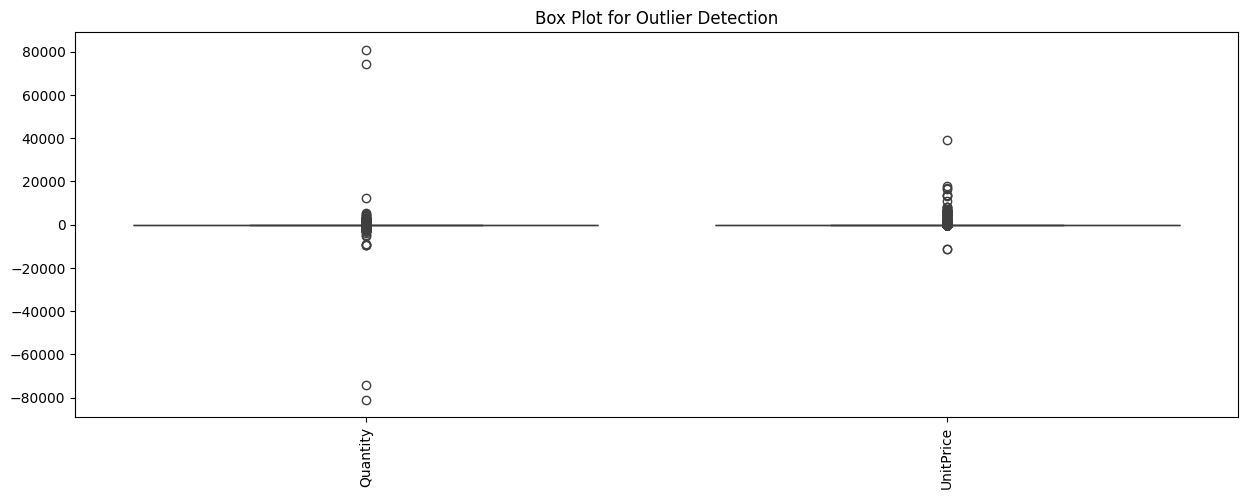

In [14]:
plt.figure(figsize=(15,5))
sns.boxplot(data=train_data[["Quantity","UnitPrice"]])
plt.xticks(rotation=90)
plt.title('Box Plot for Outlier Detection')
plt.show()

In [15]:
# YOUR CODE HERE
def handle_outliers(df,columns):

  for col in columns:

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.clip(df[col] ,lower_bound, upper_bound)

  return df

#### After outlier removal

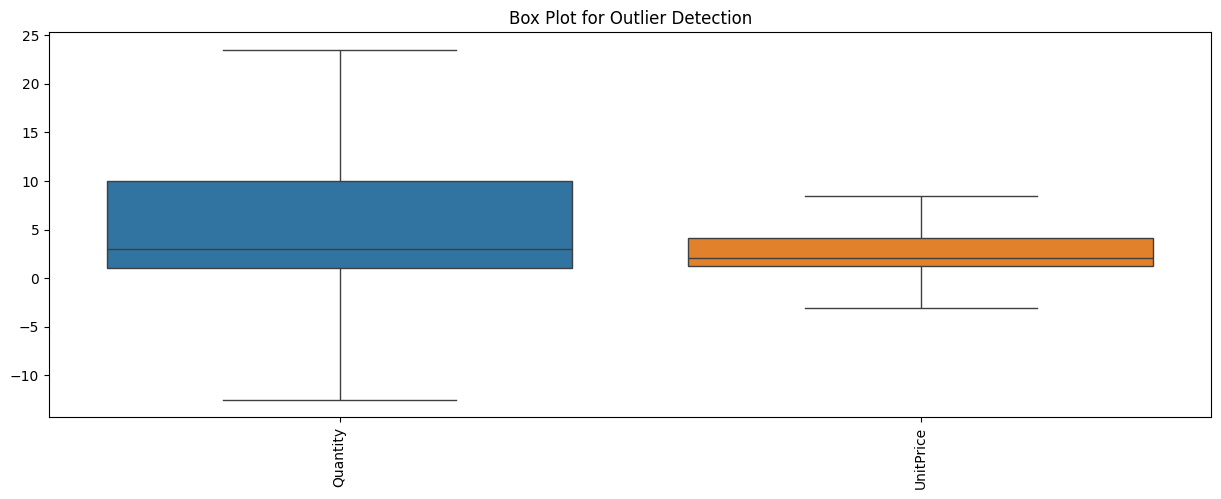

In [16]:
plt.figure(figsize=(15,5))
sns.boxplot(data=handle_outliers(train_data,["Quantity","UnitPrice"])[["Quantity","UnitPrice"]])
plt.xticks(rotation=90)
plt.title('Box Plot for Outlier Detection')
plt.show()

#### Gaussain outlier removal

In [17]:
from sklearn.mixture import GaussianMixture

def identify_outliers_gmm(df, columns):
    df_new = pd.DataFrame(df, columns=columns)
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_new)

    gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
    gmm.fit(df_scaled)
    # labels = gmm.predict(df[columns])
    # Compute the probabilities (likelihood) for each point
    probabilities = gmm.score_samples(df_scaled)  # Log likelihoods for each sample

    # Define a threshold for outlier detection
    threshold = np.percentile(probabilities, 10)  # Keep top 10% as normal, the rest as anomalies
    print(f"Threshold value {threshold}")

    # Identify anomalies: those with log-likelihood below the threshold
    anomalies = df_scaled[probabilities < threshold]

    # Flag anomalies in the original DataFrame (non-scaled)
    df_new['Outlier'] = np.where(probabilities < threshold, 1, 0)

#### Normal histogram distribution

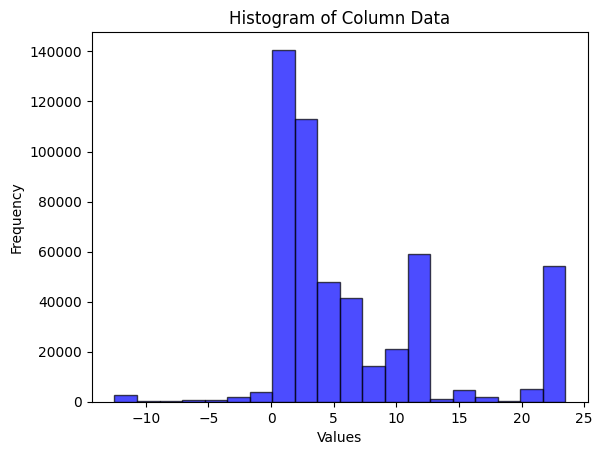

In [18]:
plt.hist(train_data['Quantity'], bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Column Data')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [19]:
train_data["InvoiceDate"] = pd.to_datetime(train_data["InvoiceDate"])

In [20]:
train_data["DayofWeek"] = train_data["InvoiceDate"].dt.dayofweek

In [21]:
train_data["Month"] = train_data["InvoiceDate"].dt.month_name()

In [22]:
train_data["Year"] = train_data["InvoiceDate"].dt.year

#### Drop the Customer ID Column

In [23]:
def preprocessing_dataset(train_data):

  # dropping rows with na in customerid and description

  train_data.dropna(subset=["Description"],inplace=True)

  train_data.dropna(subset=["CustomerID"],inplace=True)

  # dropping all the duplicate rows

  train_data.drop_duplicates(inplace=True)

  cancelled_orders = train_data[train_data["InvoiceNo"].str.startswith(("C"))]

  adjusted_orders = train_data[train_data["InvoiceNo"].str.startswith(("A"))]

  # orders starting with A or C
  train_data = train_data[~train_data["InvoiceNo"].str.startswith(("A","C"))]

  # define the stock code list for values to be removed from stock code
  stockcodelist = ['POST' 'PADS' 'M' 'DOT' 'C2' 'BANK CHARGES']

  # Removing all the stock codes from the list
  train_data = train_data[~train_data["StockCode"].str.startswith(("POST","PADS","M","DOT","C2","BANK CHARGES"))]

  train_data = handle_outliers(train_data,["Quantity","UnitPrice"])

  # convert it to datetime

  train_data["InvoiceDate"] = pd.to_datetime(train_data["InvoiceDate"])

  train_data["DayofWeek"] = train_data["InvoiceDate"].dt.day

  train_data["Month"] = train_data["InvoiceDate"].dt.month_name()

  train_data["Year"] = train_data["InvoiceDate"].dt.year

  train_data["Hour"] = train_data['InvoiceDate'].dt.hour


  return train_data



In [24]:
train_data = pd.read_csv("Online_Retail_Train.csv")

In [25]:
train_data = preprocessing_dataset(train_data)

In [26]:
train_data.head(5)

InvoiceNo StockCode                         Description  Quantity  \
0    579427     22636  CHILDS BREAKFAST SET CIRCUS PARADE         2   
1    554092     21916     SET 12 RETRO WHITE CHALK STICKS        24   
2    577774     84692         BOX OF 24 COCKTAIL PARASOLS         6   
5    579668     23575             SNACK TRAY PAISLEY PARK         8   
7    547684     23176              ABC TREASURE BOOK BOX          8   

          InvoiceDate  UnitPrice  CustomerID         Country  DayofWeek  \
0 2011-11-29 13:04:00       7.50     16479.0  United Kingdom         29   
1 2011-05-22 12:41:00       0.42     17176.0  United Kingdom         22   
2 2011-11-21 15:57:00       0.42     16712.0  United Kingdom         21   
5 2011-11-30 12:32:00       1.95     15152.0  United Kingdom         30   
7 2011-03-24 14:46:00       2.25     12408.0         Belgium         24   

      Month  Year  Hour  
0  November  2011    13  
1       May  2011    12  
2  November  2011    15  
5  November  2011    12  
7     March  2011    14

## Understanding new insights from the data

## Insights from the Data

#### Removing free items from the dataset

In [28]:
# YOUR CODE HERE
train_data = train_data[train_data["UnitPrice"]!=0]

*Above we see 1003 free items, however many of them seem to be items with ?,check, Sale error*

#### Number of Transactions per country

In [29]:
no_of_transactions = train_data.groupby("Country")["InvoiceNo"].nunique().sort_values(ascending=False)

In [30]:
no_of_transactions.head(2)

Country
United Kingdom    16516
Germany             443
Name: InvoiceNo, dtype: int64

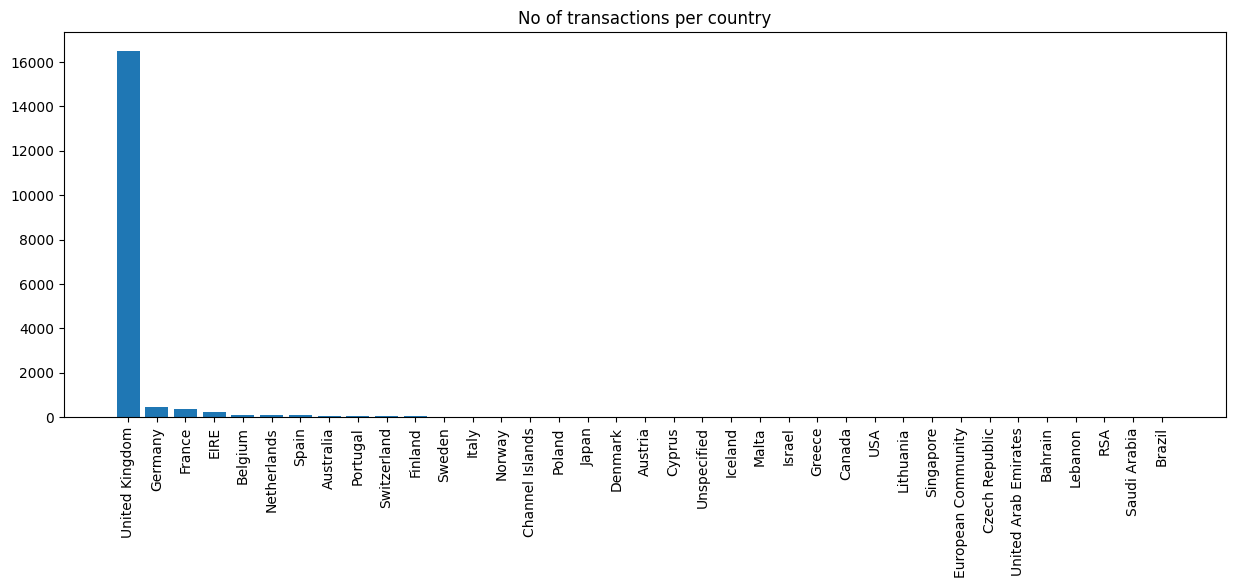

In [31]:
plt.figure(figsize=(15,5))
plt.bar(no_of_transactions.index,no_of_transactions.values)
plt.xticks(rotation=90)
plt.title("No of transactions per country")
plt.show()

#### Ratio of single time purchasers to Repeat purchasers


In [32]:
only_1_count = (train_data.groupby("CustomerID")["InvoiceNo"].nunique() == 1).sum()

In [33]:
more_1_count = (train_data.groupby("CustomerID")["InvoiceNo"].nunique() > 1).sum()

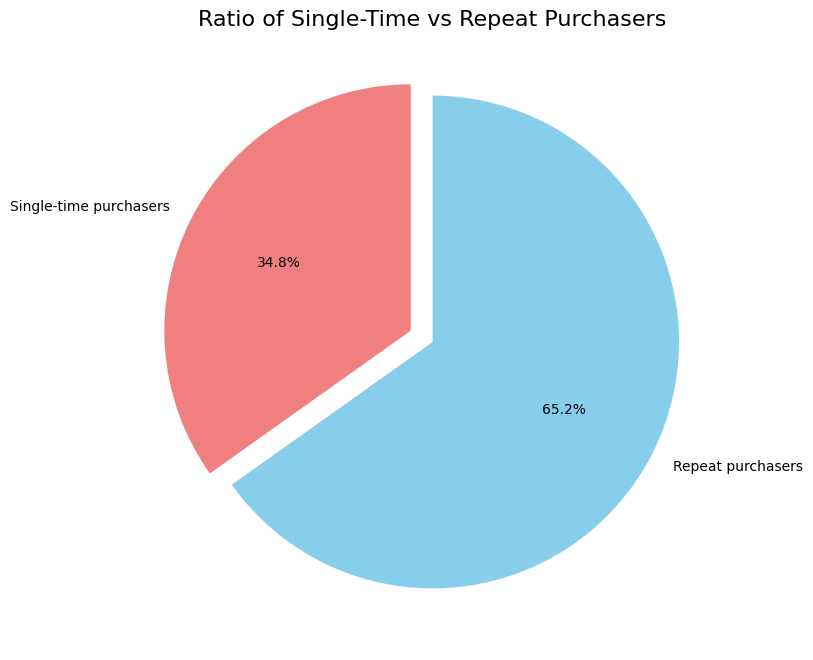

In [34]:
ratio = {"Single-time purchasers": only_1_count, "Repeat purchasers": more_1_count}

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set figure size
plt.pie(
    ratio.values(),  # Values for slices
    labels=ratio.keys(),  # Labels for each slice
    autopct="%1.1f%%",  # Display percentages
    startangle=90,  # Rotate the chart for balance
    colors=["lightcoral", "skyblue"],  # Custom colors
    explode=[0.1, 0]  # Slightly separate the single-time purchasers slice
)
plt.title("Ratio of Single-Time vs Repeat Purchasers", fontsize=16)
plt.show()

In [35]:
train_data.head(2)

InvoiceNo StockCode                         Description  Quantity  \
0    579427     22636  CHILDS BREAKFAST SET CIRCUS PARADE         2   
1    554092     21916     SET 12 RETRO WHITE CHALK STICKS        24   

          InvoiceDate  UnitPrice  CustomerID         Country  DayofWeek  \
0 2011-11-29 13:04:00       7.50     16479.0  United Kingdom         29   
1 2011-05-22 12:41:00       0.42     17176.0  United Kingdom         22   

      Month  Year  Hour  
0  November  2011    13  
1       May  2011    12

In [36]:
train_data["month_num"] = train_data['InvoiceDate'].dt.month

In [37]:
train_data["day"] = train_data['InvoiceDate'].dt.day_name()

#### Calculate the Total Sales by Month

In [38]:
df_sale_month = pd.DataFrame(train_data[train_data["Year"]==2011].groupby(["Month","month_num"])["InvoiceNo"].count().reset_index())

In [39]:
df_sale_month = df_sale_month.sort_values(by="month_num",ascending=True)

In [40]:
df_sale_Day = pd.DataFrame(train_data[train_data["Year"]==2011].groupby("day")["InvoiceNo"].count().reset_index())

In [41]:
df_sale_Day.head(5)

day  InvoiceNo
0    Friday      48356
1    Monday      57013
2    Sunday      53894
3  Thursday      69561
4   Tuesday      59436

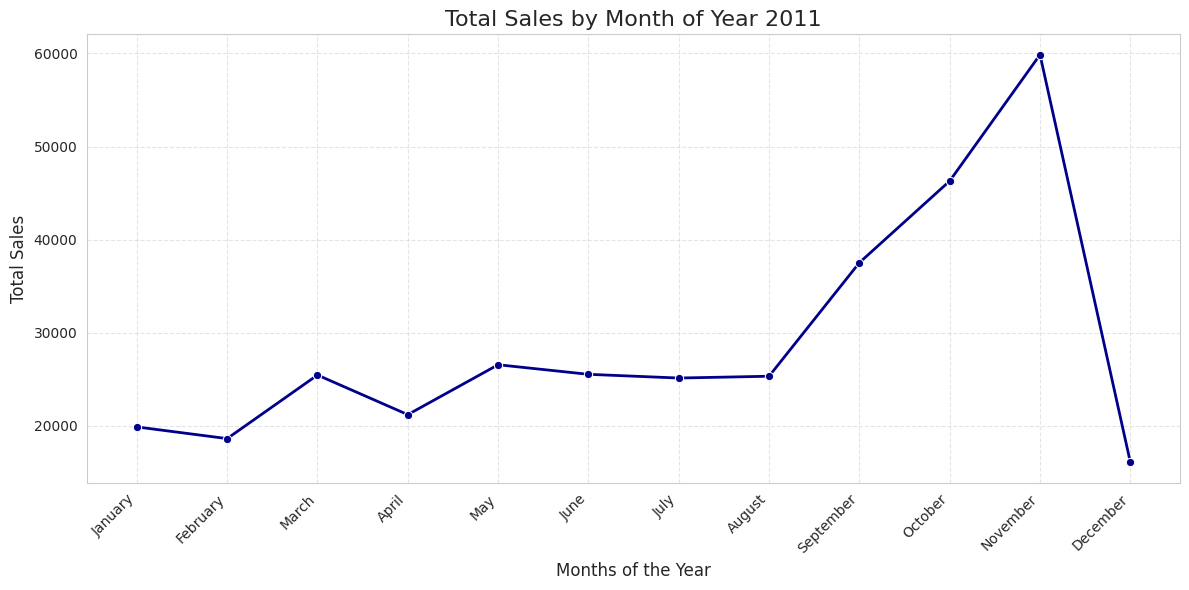

In [42]:
# Set the style
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_sale_month, x=df_sale_month["Month"], y=df_sale_month["InvoiceNo"], marker='o', color='darkblue', linewidth=2)
plt.title('Total Sales by Month of Year 2011', fontsize=16)
plt.xlabel('Months of the Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
plt.tight_layout()
plt.show()

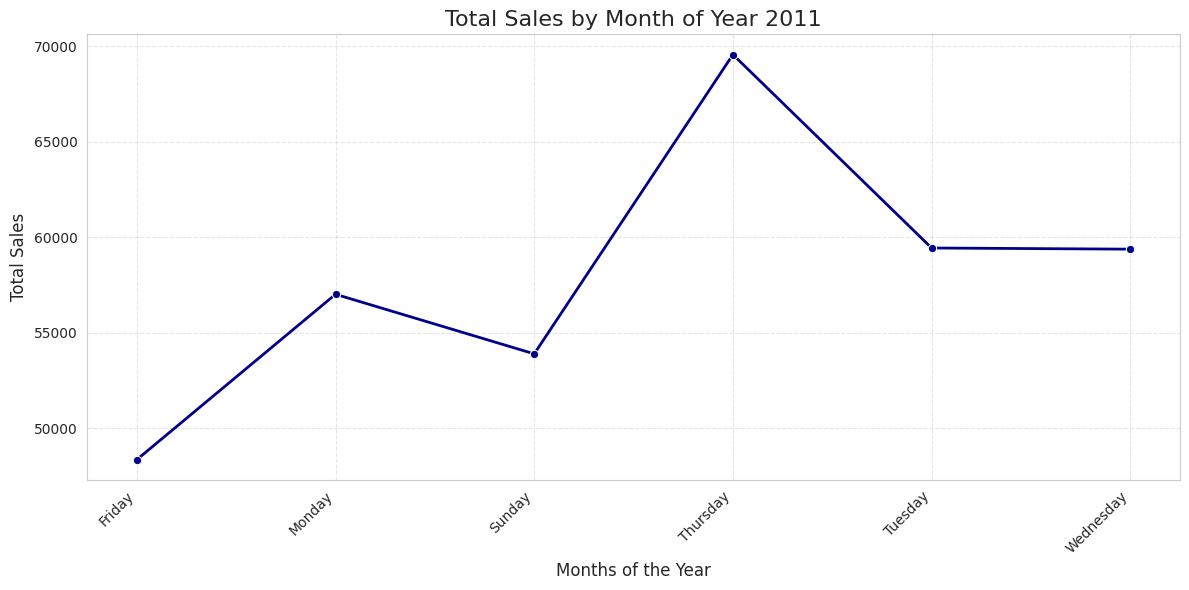

In [43]:
# Set the style
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_sale_Day, x=df_sale_Day["day"], y=df_sale_Day["InvoiceNo"], marker='o', color='darkblue', linewidth=2)
plt.title('Total Sales by Month of Year 2011', fontsize=16)
plt.xlabel('Months of the Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
plt.tight_layout()
plt.show()

In [44]:
train_data['Time'] = train_data['InvoiceDate'].dt.strftime('%H')

In [45]:
train_data.head(2)

InvoiceNo StockCode                         Description  Quantity  \
0    579427     22636  CHILDS BREAKFAST SET CIRCUS PARADE         2   
1    554092     21916     SET 12 RETRO WHITE CHALK STICKS        24   

          InvoiceDate  UnitPrice  CustomerID         Country  DayofWeek  \
0 2011-11-29 13:04:00       7.50     16479.0  United Kingdom         29   
1 2011-05-22 12:41:00       0.42     17176.0  United Kingdom         22   

      Month  Year  Hour  month_num      day Time  
0  November  2011    13         11  Tuesday   13  
1       May  2011    12          5   Sunday   12

#### Products bought histogram

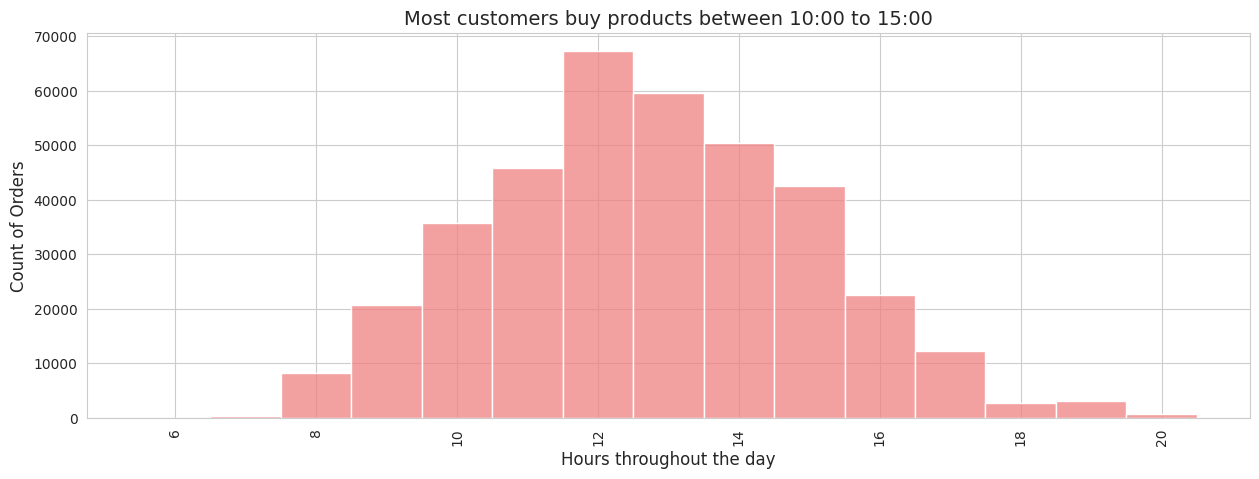

In [46]:
plt.figure(figsize=(15,5))
sns.histplot(sorted(train_data['Hour']), discrete=True, color='lightcoral', kde=False)
plt.xticks(rotation=90)
plt.xlabel('Hours throughout the day', fontsize=12)
plt.ylabel('Count of Orders', fontsize=12)
plt.title('Most customers buy products between 10:00 to 15:00', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()


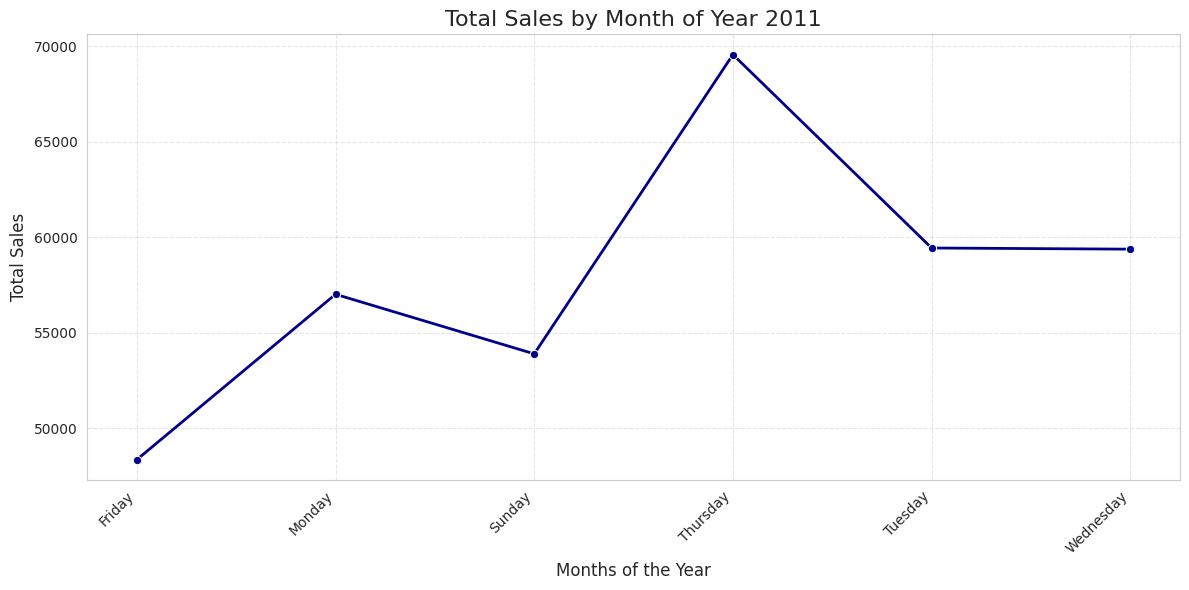

In [47]:
# Set the style
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_sale_Day, x=df_sale_Day["day"], y=df_sale_Day["InvoiceNo"], marker='o', color='darkblue', linewidth=2)
plt.title('Total Sales by Month of Year 2011', fontsize=16)
plt.xlabel('Months of the Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
plt.tight_layout()
plt.show()

#### Heat map of Month and Day of Week

In [48]:
pivot_table = train_data.pivot_table(
    values="UnitPrice",
    index="Month",
    columns="day",
)

In [49]:
train_data.head(2)

InvoiceNo StockCode                         Description  Quantity  \
0    579427     22636  CHILDS BREAKFAST SET CIRCUS PARADE         2   
1    554092     21916     SET 12 RETRO WHITE CHALK STICKS        24   

          InvoiceDate  UnitPrice  CustomerID         Country  DayofWeek  \
0 2011-11-29 13:04:00       7.50     16479.0  United Kingdom         29   
1 2011-05-22 12:41:00       0.42     17176.0  United Kingdom         22   

      Month  Year  Hour  month_num      day Time  
0  November  2011    13         11  Tuesday   13  
1       May  2011    12          5   Sunday   12

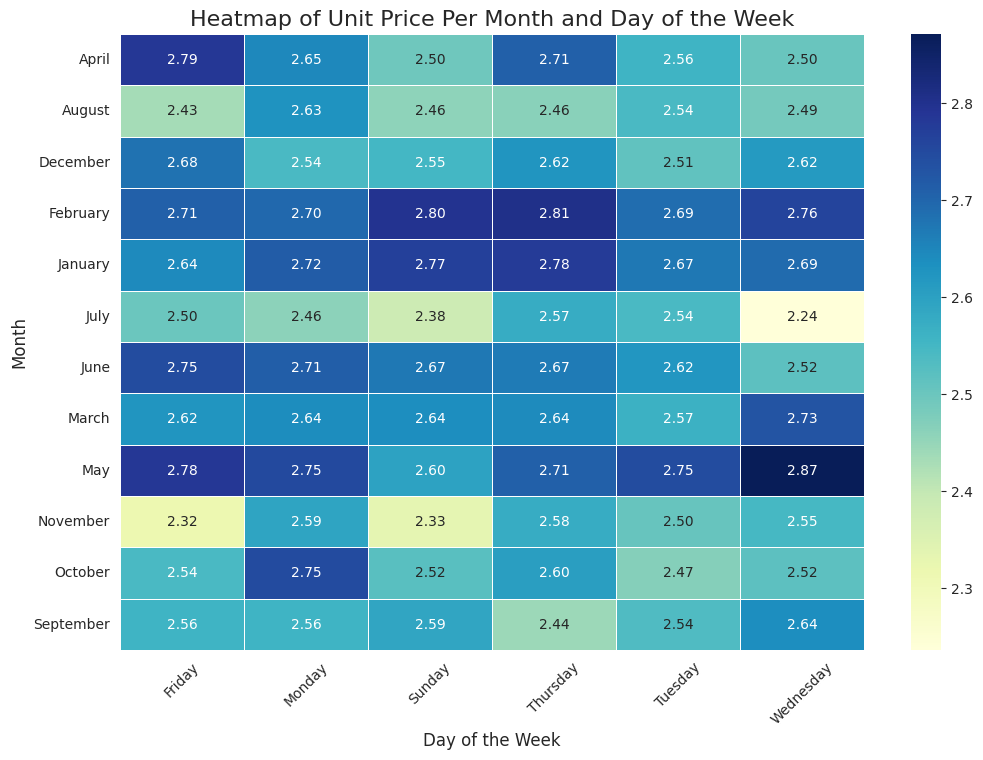

In [50]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=0.5,
)
plt.title("Heatmap of Unit Price Per Month and Day of the Week", fontsize=16)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Month", fontsize=12)
plt.xticks(rotation=45)
plt.show()

#### Customers who bought most number of items

In [51]:
customers_bought_most_items = train_data.groupby("CustomerID")["InvoiceNo"].count().sort_values(ascending=False).head(10)

In [52]:
customers_bought_most_items.index = customers_bought_most_items.index.astype(str)

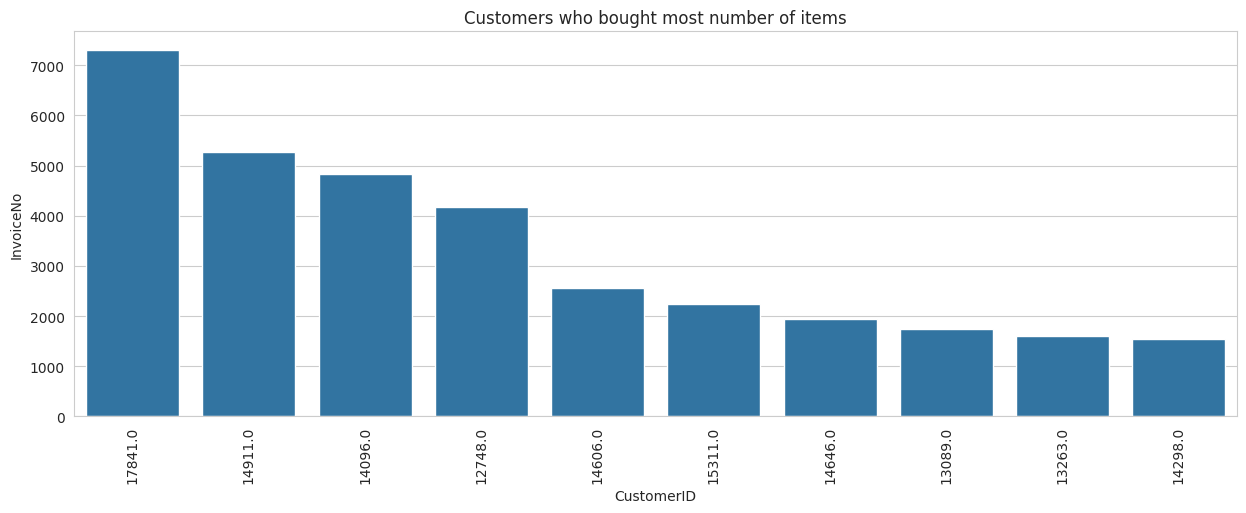

In [53]:
plt.figure(figsize=(15,5))
sns.barplot(customers_bought_most_items)
plt.xticks(rotation=90)
plt.title("Customers who bought most number of items")
plt.show()

#### Most number of items bought

In [54]:
most_number_of_itmes_bought = train_data.groupby('StockCode')['CustomerID'].nunique().nlargest(10)

In [55]:
most_number_of_itmes_bought

StockCode
22423     852
85123A    826
47566     685
84879     653
85099B    618
22720     617
21212     616
22086     591
22457     568
22138     563
Name: CustomerID, dtype: int64

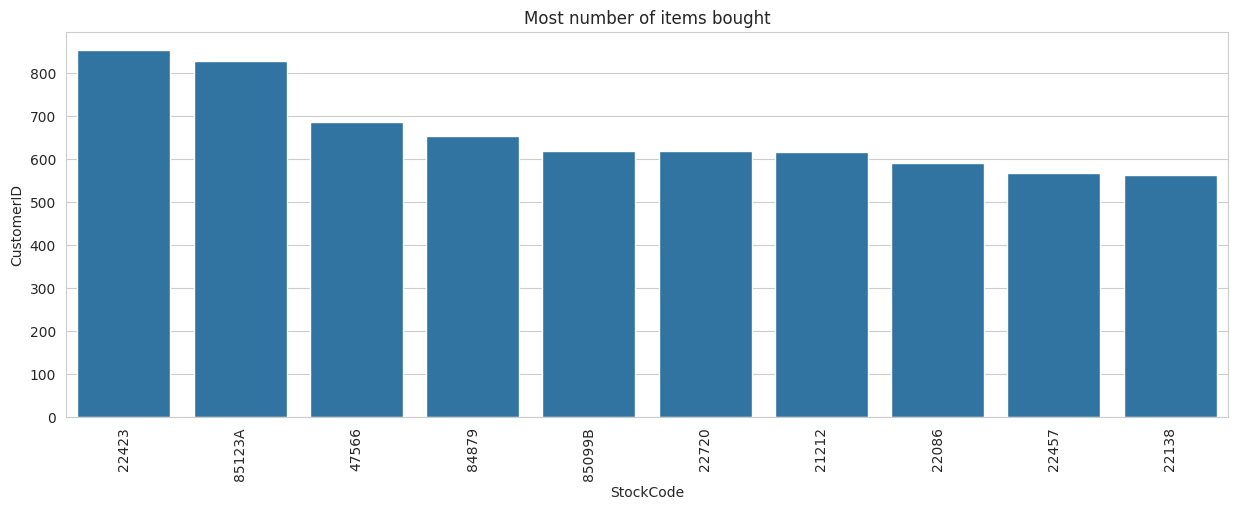

In [56]:
plt.figure(figsize=(15,5))
sns.barplot(most_number_of_itmes_bought)
plt.xticks(rotation=90)
plt.title("Most number of items bought")
plt.show()

#### Total amount spent by customer and aggregation

In [57]:
train_data["Total"] = train_data["Quantity"] * train_data["UnitPrice"]

In [58]:
train_data.head(2)

InvoiceNo StockCode                         Description  Quantity  \
0    579427     22636  CHILDS BREAKFAST SET CIRCUS PARADE         2   
1    554092     21916     SET 12 RETRO WHITE CHALK STICKS        24   

          InvoiceDate  UnitPrice  CustomerID         Country  DayofWeek  \
0 2011-11-29 13:04:00       7.50     16479.0  United Kingdom         29   
1 2011-05-22 12:41:00       0.42     17176.0  United Kingdom         22   

      Month  Year  Hour  month_num      day Time  Total  
0  November  2011    13         11  Tuesday   13  15.00  
1       May  2011    12          5   Sunday   12  10.08

In [59]:
import datetime as dt

# YOUR CODE HERE: RFM - Recency, Frequency, monetary
def create_new_features_and_group(data):

#Recency

    latest_date = data['InvoiceDate'].max() + dt.timedelta(days = 1)

    rfm = data.groupby('CustomerID').agg({
        'InvoiceDate': lambda x: (latest_date - x.max()).days,
        'InvoiceNo': 'nunique',
        "StockCode":"nunique",
        'Total': 'sum'
    }).reset_index()

    rfm.rename(columns = {
        'InvoiceDate': 'Recency',
        'InvoiceNo': 'Frequency',
        "StockCode": "UniqueProductsBought",
        'Total': 'MonetaryValue'
    }, inplace = True)

    return rfm

In [60]:
train_data.head(2)

InvoiceNo StockCode                         Description  Quantity  \
0    579427     22636  CHILDS BREAKFAST SET CIRCUS PARADE         2   
1    554092     21916     SET 12 RETRO WHITE CHALK STICKS        24   

          InvoiceDate  UnitPrice  CustomerID         Country  DayofWeek  \
0 2011-11-29 13:04:00       7.50     16479.0  United Kingdom         29   
1 2011-05-22 12:41:00       0.42     17176.0  United Kingdom         22   

      Month  Year  Hour  month_num      day Time  Total  
0  November  2011    13         11  Tuesday   13  15.00  
1       May  2011    12          5   Sunday   12  10.08

In [61]:
rfm = create_new_features_and_group(train_data)

In [62]:
rfm.head(20)

CustomerID  Recency  Frequency  UniqueProductsBought  MonetaryValue
0      12346.0      326          1                     1          28.08
1      12347.0        2          7                   100        3659.24
2      12348.0       75          4                    20         482.24
3      12349.0       19          1                    67        1232.51
4      12350.0      310          1                    16         294.40
5      12352.0       36          7                    57        1325.94
6      12353.0      204          1                     2          29.30
7      12354.0      232          1                    55         961.35
8      12355.0      214          1                    10         237.45
9      12356.0       23          3                    50        1831.34
10     12357.0       33          1                   125        4944.32
11     12358.0        2          2                    12         775.95
12     12359.0       58          4                   205        4383.33
13     12360.0       52          3                   103        2035.11
14     12361.0      287          1                     9         174.90
15     12362.0        3         10                   195        4332.98
16     12363.0      110          2                    23         544.35
17     12364.0        8          4                    67        1116.99
18     12365.0      291          1                    19         295.40
19     12367.0        4          1                    10         143.97

In [63]:
latest_date = train_data['InvoiceDate'].max() + dt.timedelta(days = 1)
# # frequncey of how many transcations done by customer
# # sum of all the costs done by customer

train_data.groupby('CustomerID').agg({
        'InvoiceDate': lambda x: (latest_date - x.max()).days

    }).reset_index()

CustomerID  InvoiceDate
0        12346.0          326
1        12347.0            2
2        12348.0           75
3        12349.0           19
4        12350.0          310
...          ...          ...
4327     18280.0          278
4328     18281.0          181
4329     18282.0            8
4330     18283.0            4
4331     18287.0           43

[4332 rows x 2 columns]

In [64]:
train_data.head(5)

InvoiceNo StockCode                         Description  Quantity  \
0    579427     22636  CHILDS BREAKFAST SET CIRCUS PARADE         2   
1    554092     21916     SET 12 RETRO WHITE CHALK STICKS        24   
2    577774     84692         BOX OF 24 COCKTAIL PARASOLS         6   
5    579668     23575             SNACK TRAY PAISLEY PARK         8   
7    547684     23176              ABC TREASURE BOOK BOX          8   

          InvoiceDate  UnitPrice  CustomerID         Country  DayofWeek  \
0 2011-11-29 13:04:00       7.50     16479.0  United Kingdom         29   
1 2011-05-22 12:41:00       0.42     17176.0  United Kingdom         22   
2 2011-11-21 15:57:00       0.42     16712.0  United Kingdom         21   
5 2011-11-30 12:32:00       1.95     15152.0  United Kingdom         30   
7 2011-03-24 14:46:00       2.25     12408.0         Belgium         24   

      Month  Year  Hour  month_num        day Time  Total  
0  November  2011    13         11    Tuesday   13  15.00  
1       May  2011    12          5     Sunday   12  10.08  
2  November  2011    15         11     Monday   15   2.52  
5  November  2011    12         11  Wednesday   12  15.60  
7     March  2011    14          3   Thursday   14  18.00

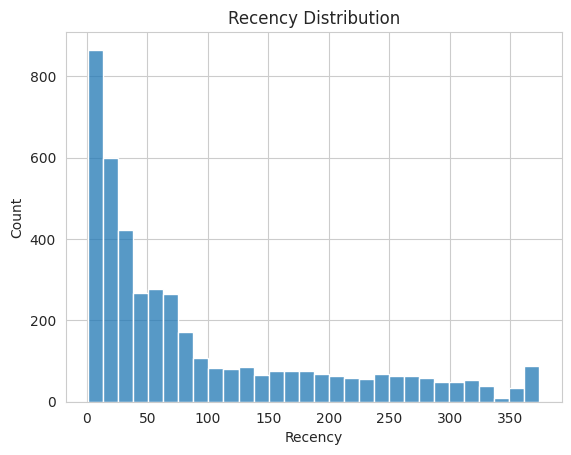

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
#Eliminating Future warning
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
####################################
# recency Distribution
sns.histplot(data = rfm, x = 'Recency', bins = 30)
plt.title('Recency Distribution')
plt.show()

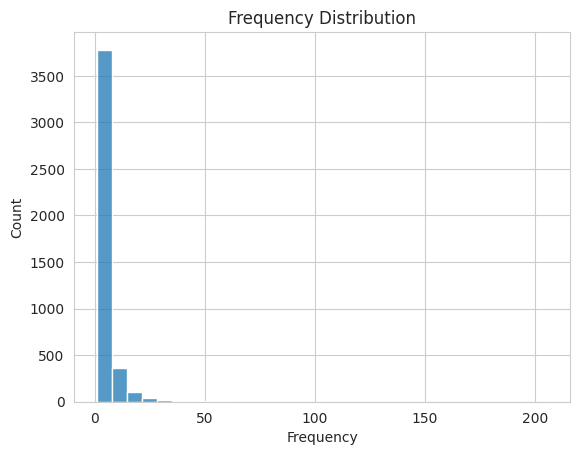

In [66]:
sns.histplot(data = rfm, x = 'Frequency', bins = 30)
plt.title('Frequency Distribution')
plt.show()

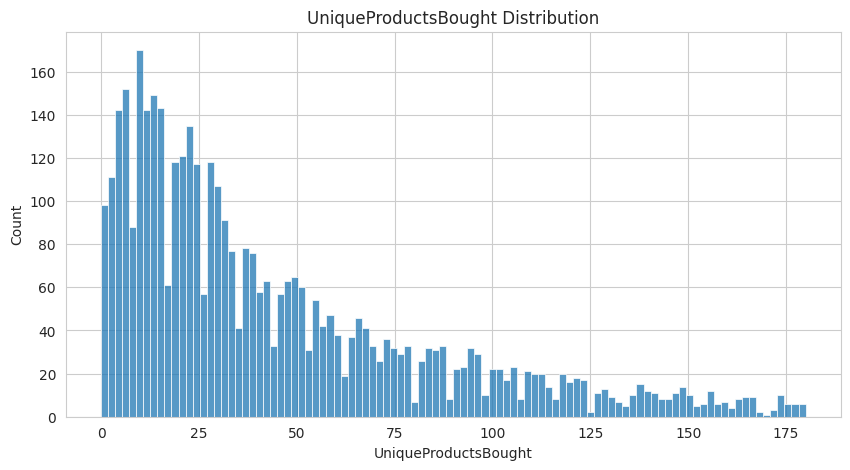

In [67]:
plt.figure(figsize=(10,5))
sns.histplot(data = rfm, x = 'UniqueProductsBought', bins = 100,binrange=(0,180))
plt.title('UniqueProductsBought Distribution')
plt.show()

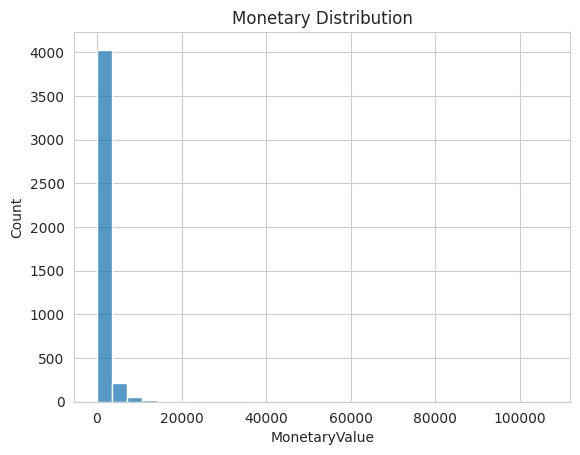

In [68]:
sns.histplot(data = rfm, x = 'MonetaryValue', bins = 30)
plt.title('Monetary Distribution')
plt.show()

In [69]:
rfm = handle_outliers(rfm,["Recency","Frequency","MonetaryValue","UniqueProductsBought"])

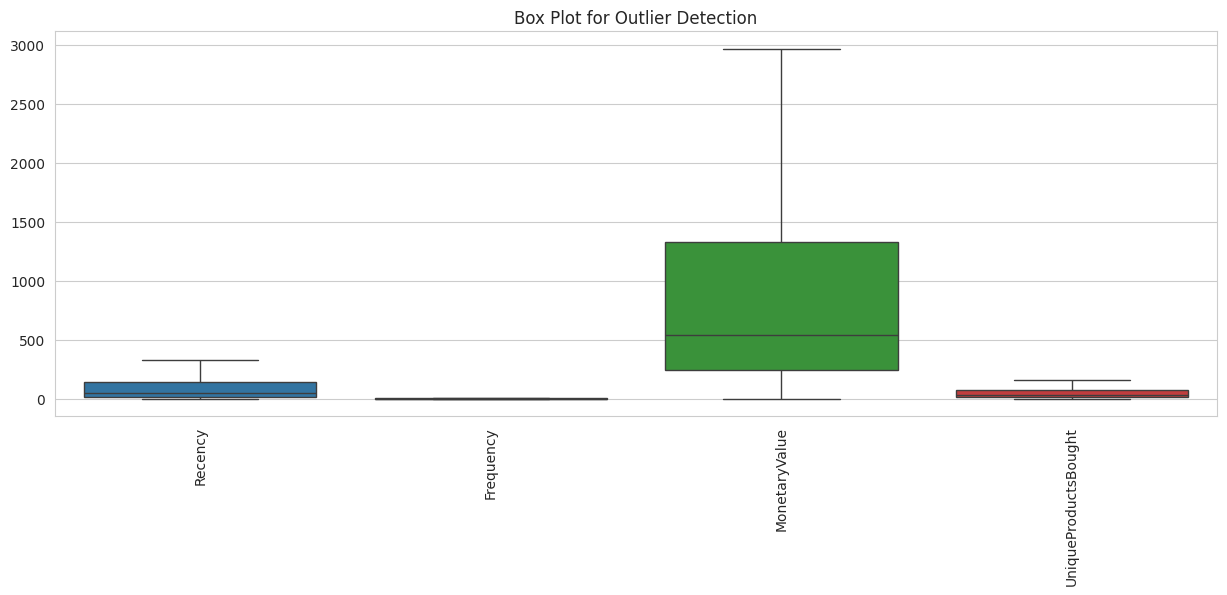

In [70]:
# YOUR CODE HERE
plt.figure(figsize=(15,5))
sns.boxplot(data=rfm[["Recency","Frequency","MonetaryValue","UniqueProductsBought"]])
plt.xticks(rotation=90)
plt.title('Box Plot for Outlier Detection')
plt.show()

#### Applying Standard Scalar

In [71]:
# YOUR CODE HERE for scaling
from sklearn.preprocessing import StandardScaler

def scale_features(data):
    # 1. Define the features to scale
    features_to_scale = ['Recency', 'Frequency', 'MonetaryValue',"UniqueProductsBought"]

    # 2. Initialize StandardScaler
    scaler = StandardScaler()

    # 3. Scale the features
    data_scaled = data.copy()
    data_scaled[features_to_scale] = scaler.fit_transform(data[features_to_scale])


    return data_scaled,scaler

In [72]:
#after grouping and feature creation
scaled_train_data, scaler = scale_features(rfm)

# Display the scaled dataset
scaled_train_data.head()

CustomerID   Recency  Frequency  UniqueProductsBought  MonetaryValue
0     12346.0  2.402534  -0.813553             -1.061001      -0.979486
1     12347.0 -0.919182   1.168810              1.020452       2.222215
2     12348.0 -0.170771   0.177629             -0.661531      -0.484484
3     12349.0 -0.744895  -0.813553              0.326634       0.333257
4     12350.0  2.238499  -0.813553             -0.745630      -0.689216

In [73]:
scaled_train_data.shape

(4332, 5)

In [74]:
scaled_train_data.head(2)

CustomerID   Recency  Frequency  UniqueProductsBought  MonetaryValue
0     12346.0  2.402534  -0.813553             -1.061001      -0.979486
1     12347.0 -0.919182   1.168810              1.020452       2.222215

#### Applying K-means clustering

In [75]:
# YOUR CODE HERE to apply KMeans
def apply_kmeans(data, n_clusters=3):
    # Initialize the K-Means model with the given parameters
    kmeans = KMeans(
        n_clusters=n_clusters,
        init='k-means++',
        max_iter=300,
        n_init=10,
        random_state=42
    )

    #  Fit the K-Means model on the data
    kmeans.fit(data)

    #  Extract and store the cluster labels
    data_with_clusters = data.copy()
    data_with_clusters['Cluster'] = kmeans.labels_

    # Extract the cluster centroids
    centroids = kmeans.cluster_centers_

    return data_with_clusters, centroids, kmeans

In [76]:
data_with_clusters, centroids, kmeans = apply_kmeans(scaled_train_data)

In [77]:
data_with_clusters

CustomerID   Recency  Frequency  UniqueProductsBought  MonetaryValue  \
0        12346.0  2.402534  -0.813553             -1.061001      -0.979486   
1        12347.0 -0.919182   1.168810              1.020452       2.222215   
2        12348.0 -0.170771   0.177629             -0.661531      -0.484484   
3        12349.0 -0.744895  -0.813553              0.326634       0.333257   
4        12350.0  2.238499  -0.813553             -0.745630      -0.689216   
...          ...       ...        ...                   ...            ...   
4327     18280.0  1.910428  -0.813553             -0.871778      -0.819898   
4328     18281.0  0.915963  -0.813553             -0.934853      -0.942602   
4329     18282.0 -0.857669  -0.483159             -0.850754      -0.860269   
4330     18283.0 -0.898678   2.490384              2.334500       1.089199   
4331     18287.0 -0.498841  -0.152765              0.116386       0.616442   

      Cluster  
0           1  
1           1  
2           1  
3           1  
4           1  
...       ...  
4327        0  
4328        0  
4329        0  
4330        0  
4331        0  

[4332 rows x 6 columns]

#### Plot the elbow and find the optimal point of k clusters

In [78]:
def plot_elbow(k: int, wcss: list):
# Plot the WCSS values to find the "elbow"
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, k + 1), wcss, marker='o', linestyle='-', color='b')
    plt.title("Elbow Method to Find Optimal K")
    plt.xlabel(f"Number of Clusters K")
    plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
    plt.xticks(range(1, k + 1))
    plt.grid()
    plt.show()

In [79]:
# YOUR CODE HERE
def find_optimal_clusters(data, max_k=10):
    wcss = []  # List to store within-cluster sum of squares for each K

    # Loop through possible values of K
    for k in range(1, max_k + 1):
        kmeans = KMeans(
            n_clusters=k,
            init='k-means++',
            max_iter=300,
            n_init=10,
            random_state=42
        )
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)  # Append WCSS for the current K

    # Plot the WCSS values to find the "elbow"
    # plt.figure(figsize=(8, 5))
    # plt.plot(range(1, max_k + 1), wcss, marker='o', linestyle='-', color='b')
    # plt.title("Elbow Method to Find Optimal K")
    # plt.xlabel("Number of Clusters (K)")
    # plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
    # plt.xticks(range(1, max_k + 1))
    # plt.grid()
    # plt.show()
    plot_elbow(max_k, wcss)

    # Return the WCSS values for further analysis
    return wcss

In [80]:
scaled_train_data.iloc[:,1]

0       2.402534
1      -0.919182
2      -0.170771
3      -0.744895
4       2.238499
          ...   
4327    1.910428
4328    0.915963
4329   -0.857669
4330   -0.898678
4331   -0.498841
Name: Recency, Length: 4332, dtype: float64

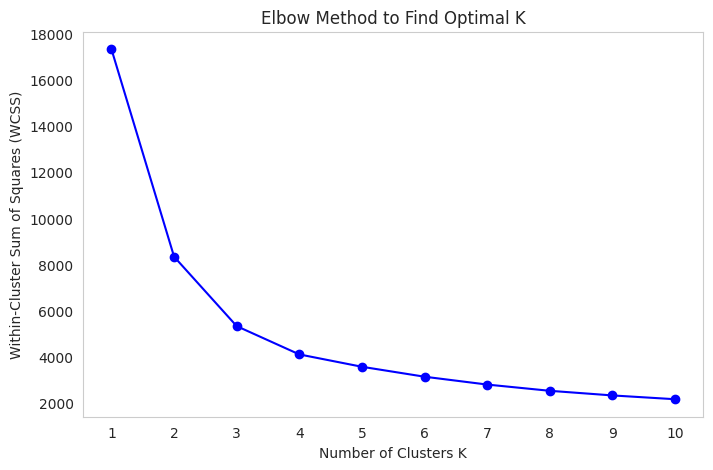

[17327.999999999993,
 8344.900850936163,
 5338.900040612206,
 4114.336072910404,
 3579.472660851135,
 3148.933089798893,
 2809.205778881486,
 2539.038991262571,
 2338.6917732396873,
 2174.7024076306957]

In [81]:
max_k = 10
find_optimal_clusters(scaled_train_data.iloc[:,1:],max_k)

In [82]:
data_with_clusters

CustomerID   Recency  Frequency  UniqueProductsBought  MonetaryValue  \
0        12346.0  2.402534  -0.813553             -1.061001      -0.979486   
1        12347.0 -0.919182   1.168810              1.020452       2.222215   
2        12348.0 -0.170771   0.177629             -0.661531      -0.484484   
3        12349.0 -0.744895  -0.813553              0.326634       0.333257   
4        12350.0  2.238499  -0.813553             -0.745630      -0.689216   
...          ...       ...        ...                   ...            ...   
4327     18280.0  1.910428  -0.813553             -0.871778      -0.819898   
4328     18281.0  0.915963  -0.813553             -0.934853      -0.942602   
4329     18282.0 -0.857669  -0.483159             -0.850754      -0.860269   
4330     18283.0 -0.898678   2.490384              2.334500       1.089199   
4331     18287.0 -0.498841  -0.152765              0.116386       0.616442   

      Cluster  
0           1  
1           1  
2           1  
3           1  
4           1  
...       ...  
4327        0  
4328        0  
4329        0  
4330        0  
4331        0  

[4332 rows x 6 columns]

#### Plotting the Silhouette score plot

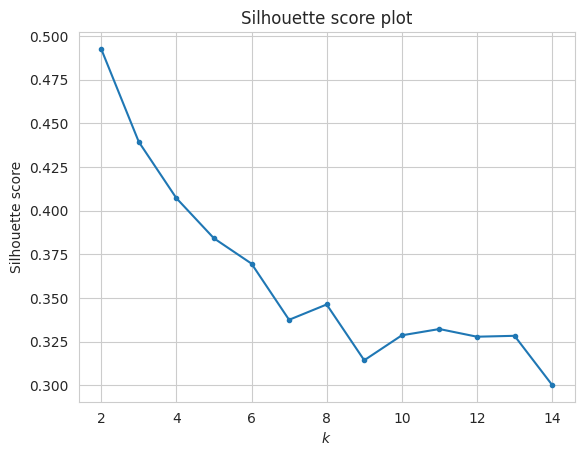

In [83]:
# Plot Silhouette score plot

from sklearn.metrics import silhouette_score
# numeric_features = scaled_train_data[['Recency', 'Frequency', 'MonetaryValue']]

clusters = np.arange(2,15)
sil_score = []
for c in clusters:
    data_with_clusters, centroids, kmeans_model = apply_kmeans(scaled_train_data.iloc[:,1:], c)
    sil_score.append(silhouette_score(scaled_train_data.iloc[:,1:], kmeans_model.labels_))

plt.plot(clusters, sil_score, marker= '.')
plt.title('Silhouette score plot')
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.show()

#### Visualizing the silhouetee score

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


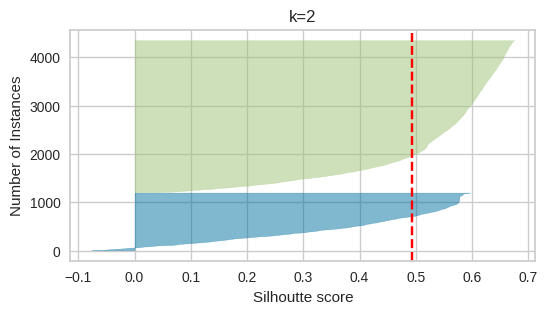

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


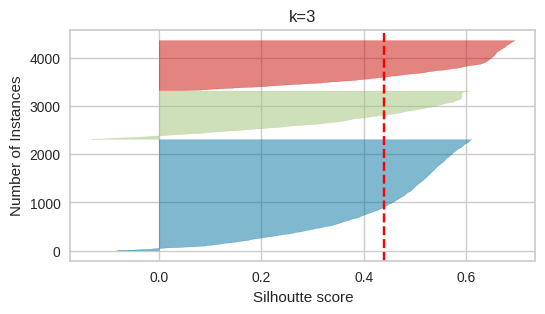

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


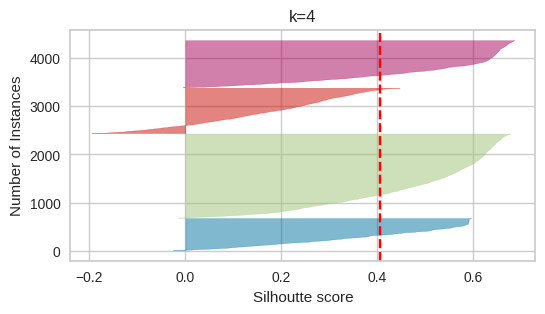

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


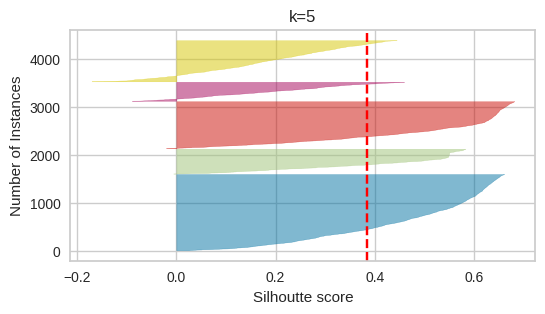

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


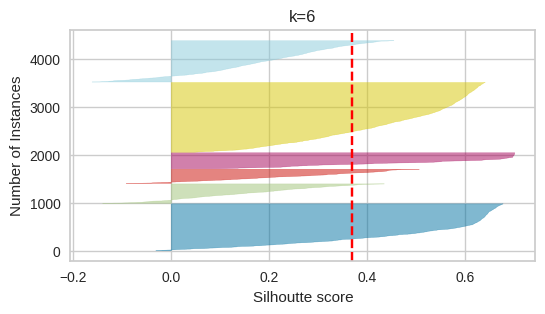

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


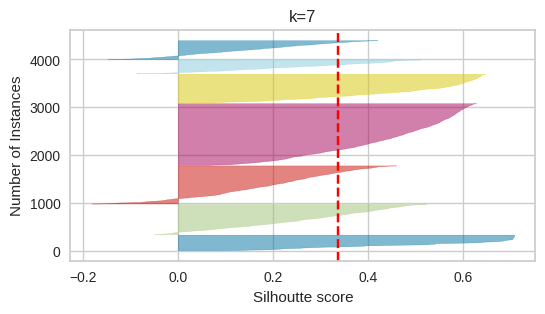

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


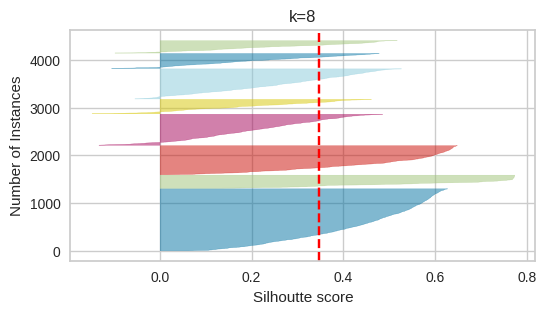

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


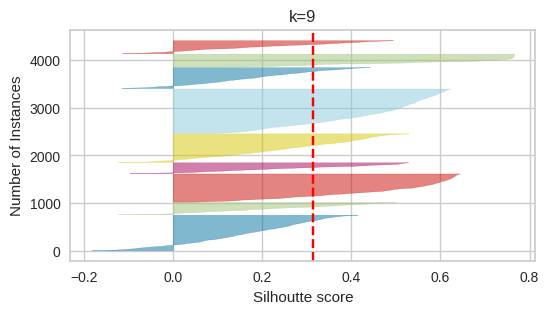

In [84]:
from yellowbrick.cluster import SilhouetteVisualizer # Import the class from the yellowbrick library

clusters = np.arange(2,10)
for c in clusters:
    plt.figure(figsize=(6, 3))
    # Instantiate the clustering model and visualizer
    data_with_clusters, centroids, kmeans_model = apply_kmeans(scaled_train_data.iloc[:,1:], c)

    # Instantiate SilhouetteVisualizer()
    visualizer = SilhouetteVisualizer(kmeans_model, colors='yellowbrick')
    # Fit the data to the visualizer
    visualizer.fit(scaled_train_data.iloc[:,1:]);
    plt.title("k={}".format(c))
    plt.xlabel("Silhoutte score")
    plt.ylabel("Number of Instances")
    plt.show()

#### Applying DBSCAN algorithm for clustering

In [85]:
# YOUR CODE HERE
def apply_dbscan(data, eps=0.1, min_samples=10):
    # Initialize the DBSCAN model
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(data)

    # Add cluster labels to the dataset
    data_with_clusters = data.copy()
    data_with_clusters['Cluster_DBSCAN'] = cluster_labels  # -1 indicates noise

    return data_with_clusters, dbscan

In [86]:
dbscan_test_data, dbscan_model = apply_dbscan(scaled_train_data.iloc[:,1:], eps=0.30, min_samples=100)

# Display the dataset with DBSCAN cluster labels
dbscan_test_data.head()
print("Unique clusters in data: ", np.unique(dbscan_model.labels_))

Unique clusters in data:  [-1  0  1  2  3  4]


In [87]:
dbscan_test_data

Recency  Frequency  UniqueProductsBought  MonetaryValue  Cluster_DBSCAN
0     2.402534  -0.813553             -1.061001      -0.979486               0
1    -0.919182   1.168810              1.020452       2.222215              -1
2    -0.170771   0.177629             -0.661531      -0.484484              -1
3    -0.744895  -0.813553              0.326634       0.333257              -1
4     2.238499  -0.813553             -0.745630      -0.689216               0
...        ...        ...                   ...            ...             ...
4327  1.910428  -0.813553             -0.871778      -0.819898               0
4328  0.915963  -0.813553             -0.934853      -0.942602               4
4329 -0.857669  -0.483159             -0.850754      -0.860269               2
4330 -0.898678   2.490384              2.334500       1.089199              -1
4331 -0.498841  -0.152765              0.116386       0.616442              -1

[4332 rows x 5 columns]

In [88]:
def comparing_score(k_means_data,dbscan_data):

  combined_data = k_means_data.copy()

  combined_data["Cluster_DBSCAN"] = dbscan_data["Cluster_DBSCAN"]

  plt.figure(figsize=(12, 3))

  plt.subplot(1, 2, 1)

  plt.scatter(combined_data["Recency"],combined_data["Frequency"],c=combined_data["Cluster_DBSCAN"],cmap="viridis",s=50,label="DBSCAN")

  plt.title("DBSCAN")
  plt.xlabel("Recency")
  plt.ylabel("Frequency")
  # putting the colorbar for the clusters
  plt.colorbar(label='Cluster_DBSCAN')

  plt.subplot(1, 2, 2)

  plt.scatter(combined_data["Recency"],combined_data["Frequency"],c=combined_data["Cluster"],cmap="viridis",s=50,label="K-Means")

  plt.title("K-means")
  plt.xlabel("Recency")
  plt.ylabel("Frequency")


  plt.colorbar(label='Cluster')

  plt.tight_layout()
  plt.show()


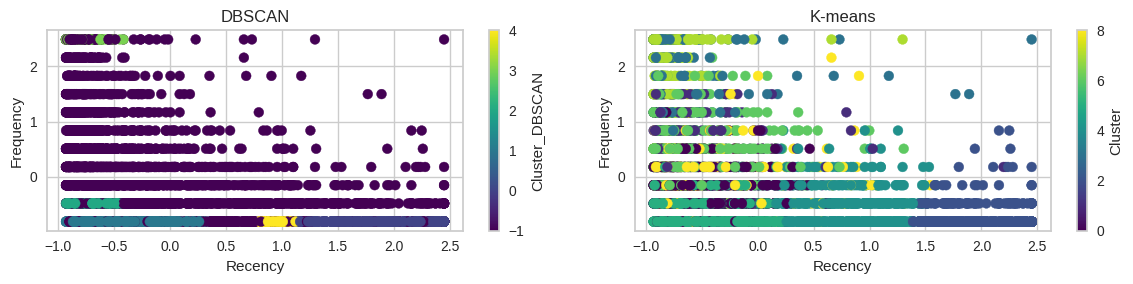

In [89]:
comparing_score(data_with_clusters,dbscan_test_data)

In [90]:
def visualize_clusters_3d(data, feature_x, feature_y, feature_z, cluster_column):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot for data points, color them by cluster
    for cluster in data[cluster_column].unique():
        cluster_data = data[data[cluster_column] == cluster]
        ax.scatter(
            cluster_data[feature_x],
            cluster_data[feature_y],
            cluster_data[feature_z],
            label=f'Cluster {cluster}',
            s=50
        )

    # Scatter plot for cluster centers
    # ax.scatter(
    #     cluster_centers[:, 0],  # X-coordinates of centers
    #     cluster_centers[:, 1],  # Y-coordinates of centers
    #     cluster_centers[:, 2],  # Z-coordinates of centers
    #     c='red',
    #     marker='X',
    #     s=200,
    #     label='Cluster Centers'
    # )

    # Labels and legend
    ax.set_title(f"3D Visualization of Clusters: {feature_x}, {feature_y}, {feature_z}")
    ax.set_xlabel(feature_x)
    ax.set_ylabel(feature_y)
    ax.set_zlabel(feature_z)
    ax.legend()

    plt.show()



In [91]:
dbscan_test_data.head(2)

Recency  Frequency  UniqueProductsBought  MonetaryValue  Cluster_DBSCAN
0  2.402534  -0.813553             -1.061001      -0.979486               0
1 -0.919182   1.168810              1.020452       2.222215              -1

In [92]:
dbscan_test_data["Cluster_DBSCAN"].unique()

array([ 0, -1,  1,  2,  3,  4])

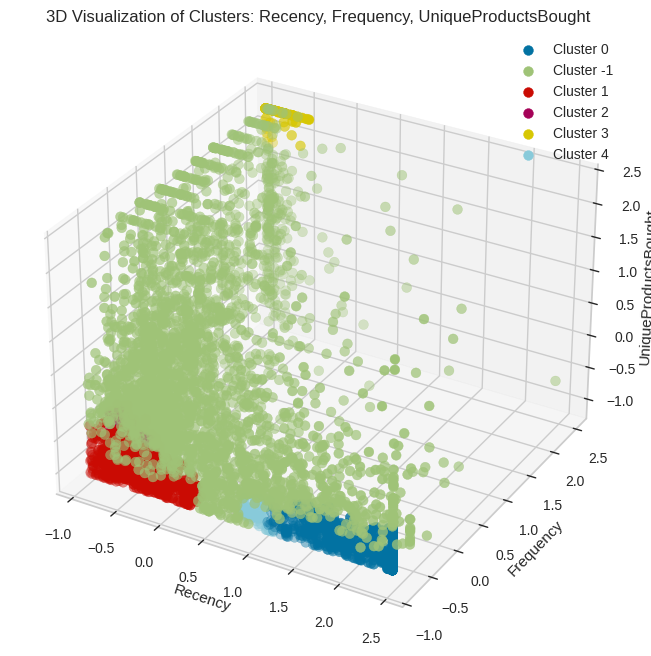

In [93]:
# Considering three features, e.g., 'Recency', 'Frequency', and 'MonetaryValue'
visualize_clusters_3d(
    data=dbscan_test_data,
    # cluster_centers= kmeans_model_features.cluster_centers_[:, [0, 1, 2]],  # Adjust based on feature indices
    feature_x='Recency',
    feature_y='Frequency',
    feature_z='UniqueProductsBought',
    cluster_column='Cluster_DBSCAN'
)

In [94]:
train_data.head(1)

InvoiceNo StockCode                         Description  Quantity  \
0    579427     22636  CHILDS BREAKFAST SET CIRCUS PARADE         2   

          InvoiceDate  UnitPrice  CustomerID         Country  DayofWeek  \
0 2011-11-29 13:04:00        7.5     16479.0  United Kingdom         29   

      Month  Year  Hour  month_num      day Time  Total  
0  November  2011    13         11  Tuesday   13   15.0

In [95]:
train_data["DayofWeek"] = train_data["InvoiceDate"].dt.dayofweek

In [96]:
train_data["DayofWeek"] = pd.to_datetime(train_data["InvoiceDate"])

In [97]:
train_data["InvoiceDay"] = train_data['InvoiceDate'].dt.date

In [98]:
favouirte_Shopping_month = train_data.groupby(['CustomerID', 'Month']).size().reset_index(name='Count')
favouirte_Shopping_month.loc[favouirte_Shopping_month.groupby('CustomerID')['Count'].idxmax()][["CustomerID","Month"]]

CustomerID     Month
0         12346.0   January
6         12347.0   October
8         12348.0  December
11        12349.0  November
12        12350.0  February
...           ...       ...
12757     18280.0     March
12758     18281.0      June
12759     18282.0    August
12768     18283.0  November
12772     18287.0   October

[4332 rows x 2 columns]

#### Creating spending features

In [99]:
def create_spending_features(df,customer_data):

    monthly_spending = df.groupby(['CustomerID', 'Year', 'Month'])['Total'].sum().reset_index()

    # Calculate Seasonal Buying Patterns: We are using monthly frequency as a proxy for seasonal buying patterns
    seasonal_buying_patterns = monthly_spending.groupby('CustomerID')['Total'].agg(['mean', 'std']).reset_index()
    seasonal_buying_patterns.rename(columns={'mean': 'Monthly_Spending_Mean', 'std': 'Monthly_Spending_Std'}, inplace=True)


    # Replace NaN values in Monthly_Spending_Std with 0, implying no variability for customers with single transaction month
    seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)

    # Calculate the average number of days between consecutive purchases
    # days_between_purchases = df.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))
    # average_days_between_purchases = days_between_purchases.groupby('CustomerID').mean().reset_index()
    # average_days_between_purchases.rename(columns={'InvoiceDay': 'Average_Days_Between_Purchases'}, inplace=True)

    # Find the favorite shopping day of the week
    favorite_shopping_day = df.groupby(['CustomerID', 'day']).size().reset_index(name='Count')
    favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'day']]

    # Find the favorite shopping hour of the day
    favorite_shopping_hour = df.groupby(['CustomerID', 'Hour']).size().reset_index(name='Count')
    favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Hour']]

    #  Favouite shopping month
    favouirte_Shopping_month = df.groupby(['CustomerID', 'Month']).size().reset_index(name='Count')
    favouirte_Shopping_month = favouirte_Shopping_month.loc[favouirte_Shopping_month.groupby('CustomerID')['Count'].idxmax()][["CustomerID","Month"]]

    # Merge the new features into the customer_data dataframe
    customer_data = pd.merge(customer_data, seasonal_buying_patterns, on='CustomerID')

    # Calculate the total spend by each customer
    total_spend = df.groupby('CustomerID')['Total'].sum().reset_index()

    # Calculate the total number of transactions made by each customer
    total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
    total_transactions.rename(columns={'InvoiceNo': 'Total_Transactions'}, inplace=True)

    # Calculate the average transaction value for each customer
    average_transaction_value = total_spend.merge(total_transactions, on='CustomerID')
    average_transaction_value['Average_Transaction_Value'] = average_transaction_value['Total'] / average_transaction_value['Total_Transactions']

    # Calculate the number of unique products purchased by each customer
    unique_products_purchased = df.groupby('CustomerID')['StockCode'].nunique().reset_index()
    unique_products_purchased.rename(columns={'StockCode': 'Unique_Products_Purchased'}, inplace=True)

   # Merge the new features into the customer_data dataframe
    # customer_data = pd.merge(customer_data, average_days_between_purchases, on='CustomerID')
    customer_data = pd.merge(customer_data, favorite_shopping_day, on='CustomerID')
    customer_data = pd.merge(customer_data, favorite_shopping_hour, on='CustomerID')
    customer_data = pd.merge(customer_data, favouirte_Shopping_month, on='CustomerID')

   # Merge the new features into the customer_data dataframe
    customer_data = pd.merge(customer_data, total_transactions, on='CustomerID')

   # Merge the new features into the customer_data dataframe
    customer_data = pd.merge(customer_data, average_transaction_value[['CustomerID', 'Average_Transaction_Value']], on='CustomerID')

  # Merge the new feature into the customer_data dataframe
    customer_data = pd.merge(customer_data, unique_products_purchased, on='CustomerID')

    return customer_data


#### Creating features such as receny, frequency, monetary value

In [100]:
def rfm_create_new_features_and_group(data):

#Recency

    latest_date = data['InvoiceDate'].max() + dt.timedelta(days = 1)

    rfm = data.groupby('CustomerID').agg({
        'InvoiceDate': lambda x: (latest_date - x.max()).days,
        'InvoiceNo': 'nunique',
        'Total': 'sum',
        'Description':'max'
    }).reset_index()

    rfm.rename(columns = {
        'InvoiceDate': 'Recency',
        'InvoiceNo': 'Frequency',
        'Total': 'MonetaryValue',
        'Description': 'MaxPurchasedItem'
    }, inplace = True)

    return rfm

#### Assigning bins to every keyword for finding out which buyer likes what kind of product

In [101]:
def assign_bin(description):
    if any(keyword in description.lower() for keyword in ['cake', 'christmas', 'party', 'gift', 'candle', 'decor', 'light', 'bell', 'tree','vintage','cocktail']):
        return 1  # Assign 1 to "Festive Buyers"
    #elif any(keyword in description.lower() for keyword in ['lunch', 'recipe','pantry', 'cook','bake', 'baking', 'dinner', 'jam', 'tea', 'pantry','jelly','choc','ginger', 'bread', 'breakfast']):
    #    return 2  # Assign 2 to "Cooking Lovers"
    elif any(keyword in description.lower() for keyword in ['heart', 'silver','necklace', 'bracelet','red', 'flower', 'pink', 'rose']):
        return 2  # Assign 2 to Luxury gift Lovers"
    else:
        return 3  # Assign 2 to Rest of buyers

def process_description_bins(data):
    # Create a list of the top 10 descriptions
    #top_10_descriptions = pp_df_train['Description'].value_counts().nlargest(10).index.tolist()
    top_10_descriptions = data.groupby('MaxPurchasedItem')['CustomerID'].nunique().nlargest(50).index.tolist()

    # Apply the function to create the new feature 'Description_Bin'
    # 1 for festival shopper
    # 0 for other shoppers
    data['Buyer_Type'] = data['MaxPurchasedItem'].apply(assign_bin)
    return data

In [102]:
processed_train_data = rfm_create_new_features_and_group(train_data)
processed_train_data = create_spending_features(train_data, processed_train_data)


In [103]:
processed_train_data = process_description_bins(processed_train_data)

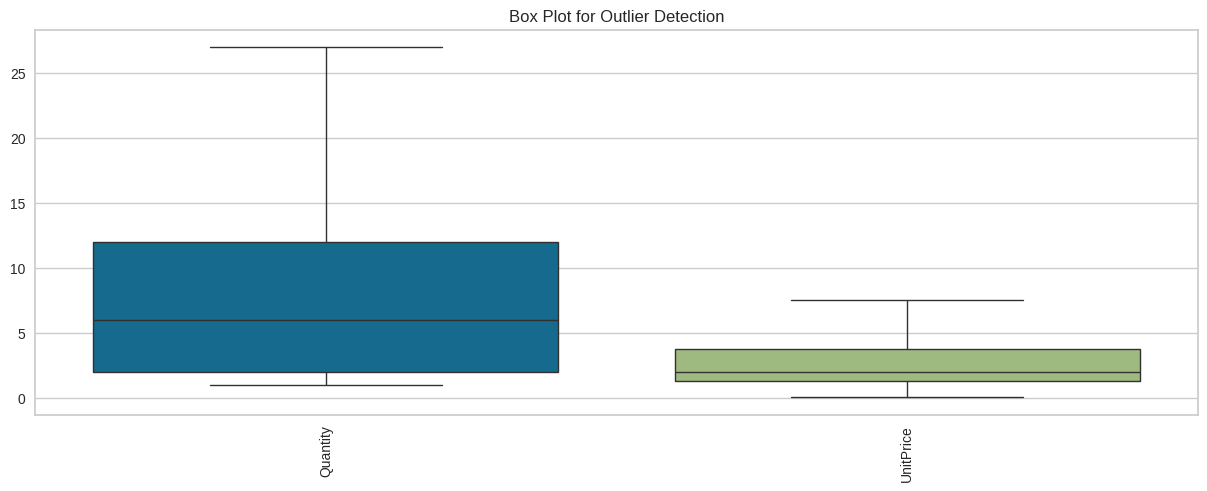

In [104]:
plt.figure(figsize=(15,5))
sns.boxplot(data=train_data[["Quantity","UnitPrice"]])
plt.xticks(rotation=90)
plt.title('Box Plot for Outlier Detection')
plt.show()

#### Dropping columns not required

In [105]:
dataframe = processed_train_data.drop(columns=['CustomerID','MaxPurchasedItem','day',"Month"])

In [106]:
dataframe.head(2)

Recency  Frequency  MonetaryValue  Monthly_Spending_Mean  \
0      326          1          28.08              28.080000   
1        2          7        3659.24             522.748571   

   Monthly_Spending_Std  Hour  Total_Transactions  Average_Transaction_Value  \
0              0.000000    10                   1                  28.080000   
1            303.757128    14                   7                 522.748571   

   Unique_Products_Purchased  Buyer_Type  
0                          1           3  
1                        100           3

#### Performing correlation on all the numeric data

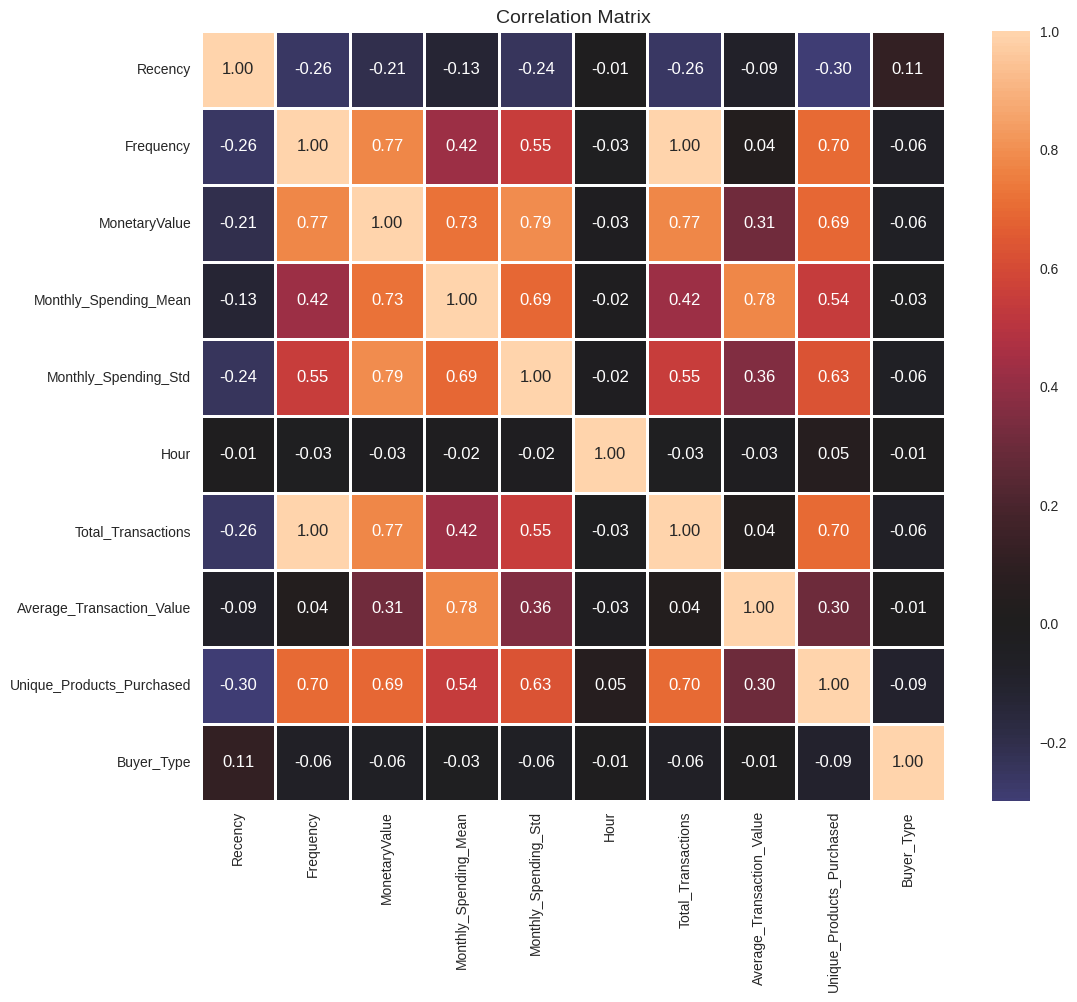

In [107]:
df_temp = processed_train_data.drop(columns=['CustomerID','MaxPurchasedItem','day',"Month"])
corr = df_temp.corr()

upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# Identify columns to drop
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop columns
# train_data = train_data.drop(columns=to_drop)


# Create a mask to only show the lower triangle of the matrix (since it's mirrored around its
# top-left to bottom-right diagonal)
# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask, k=1)] = True

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

In [108]:
to_drop

['Total_Transactions']

In [109]:
dataframe.head(2)

Recency  Frequency  MonetaryValue  Monthly_Spending_Mean  \
0      326          1          28.08              28.080000   
1        2          7        3659.24             522.748571   

   Monthly_Spending_Std  Hour  Total_Transactions  Average_Transaction_Value  \
0              0.000000    10                   1                  28.080000   
1            303.757128    14                   7                 522.748571   

   Unique_Products_Purchased  Buyer_Type  
0                          1           3  
1                        100           3

In [110]:
dataframe.describe()

Recency    Frequency  MonetaryValue  Monthly_Spending_Mean  \
count  4332.000000  4332.000000    4332.000000            4332.000000   
mean     92.668744     4.232456    1301.293585             352.092947   
std     100.173204     7.613846    3314.757725             411.028732   
min       1.000000     1.000000       3.750000               3.307500   
25%      18.000000     1.000000     244.200000             158.980000   
50%      51.000000     2.000000     545.085000             267.305000   
75%     143.000000     5.000000    1332.765000             413.741625   
max     374.000000   206.000000  106603.920000            8770.652000   

       Monthly_Spending_Std         Hour  Total_Transactions  \
count           4332.000000  4332.000000         4332.000000   
mean             111.695572    12.490766            4.232456   
std              238.434160     2.310399            7.613846   
min                0.000000     7.000000            1.000000   
25%                0.000000    11.000000            1.000000   
50%               43.315526    12.000000            2.000000   
75%              145.752026    14.000000            5.000000   
max             7181.867305    20.000000          206.000000   

       Average_Transaction_Value  Unique_Products_Purchased   Buyer_Type  
count                4332.000000                4332.000000  4332.000000  
mean                  288.409540                  59.137350     2.078024  
std                   263.919333                  82.980225     0.939356  
min                     3.307500                   1.000000     1.000000  
25%                   145.106250                  15.000000     1.000000  
50%                   231.830000                  34.000000     2.000000  
75%                   351.948003                  74.000000     3.000000  
max                  4944.320000                1751.000000     3.000000

#### Handling all the outliers

In [111]:
dataframe = handle_outliers(dataframe,list(dataframe.columns.values))

In [112]:
list(dataframe.columns.values)[:-1]

['Recency',
 'Frequency',
 'MonetaryValue',
 'Monthly_Spending_Mean',
 'Monthly_Spending_Std',
 'Hour',
 'Total_Transactions',
 'Average_Transaction_Value',
 'Unique_Products_Purchased']

#### Applying standard scalar to all the numerical columns except Buyer_Type

In [113]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scaled_data = scalar.fit_transform(dataframe.iloc[:,:-1])

In [114]:
scaled_data_dataframe = pd.DataFrame(scaled_data,columns=list(dataframe.columns.values)[:-1])

In [115]:
scaled_data_dataframe["Buyer_Type"] = dataframe["Buyer_Type"]

In [116]:
scaled_data_dataframe.head(2)

Recency  Frequency  MonetaryValue  Monthly_Spending_Mean  \
0  2.402534  -0.813553      -0.979486              -1.403210   
1 -0.919182   1.168810       2.222215               1.014046   

   Monthly_Spending_Std      Hour  Total_Transactions  \
0             -0.798345 -1.082382           -0.813553   
1              1.867563  0.659158            1.168810   

   Average_Transaction_Value  Unique_Products_Purchased  Buyer_Type  
0                  -1.473679                  -1.061001           3  
1                   1.571851                   1.020452           3

##### Finding optimal clusters for K using elbow method, here only four features are taken out of the given features

In [117]:
scaled_data_dataframe.columns

Index(['Recency', 'Frequency', 'MonetaryValue', 'Monthly_Spending_Mean',
       'Monthly_Spending_Std', 'Hour', 'Total_Transactions',
       'Average_Transaction_Value', 'Unique_Products_Purchased', 'Buyer_Type'],
      dtype='object')

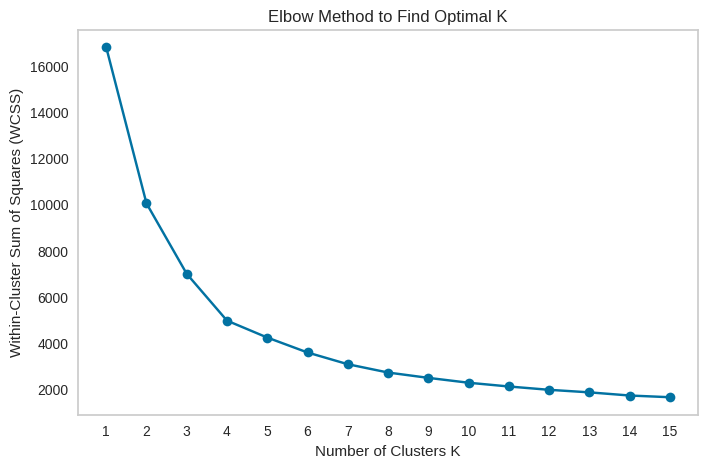

In [118]:
temp_numeric_features = scaled_data_dataframe[['Recency', 'Frequency', 'MonetaryValue','Buyer_Type']]

max_k = 15
wcss = find_optimal_clusters(temp_numeric_features, max_k)

#### Plotting the Silhouette score

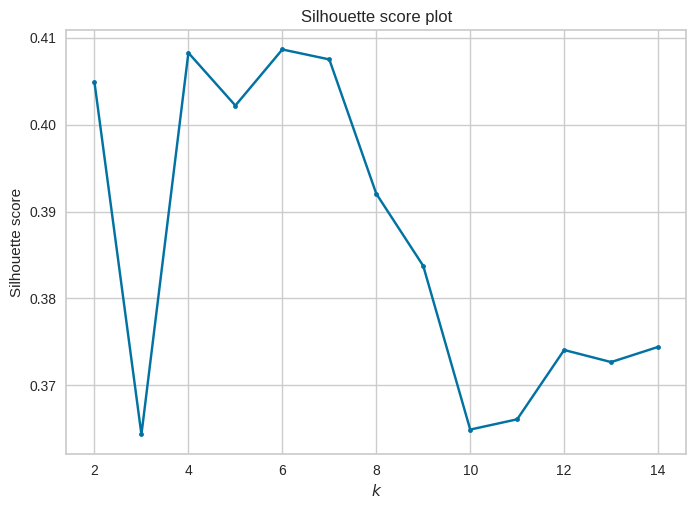

In [119]:
# Plot Silhouette score plot
temp_numeric_features = scaled_data_dataframe[['Recency', 'Frequency', 'MonetaryValue','Buyer_Type']]

clusters = np.arange(2,15)
sil_score = []
for c in clusters:
    data_with_clusters, centroids, kmeans_model = apply_kmeans(temp_numeric_features, c)
    sil_score.append(silhouette_score(temp_numeric_features, kmeans_model.labels_))

plt.plot(clusters, sil_score, marker= '.')
plt.title('Silhouette score plot')
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.show()

#### Plotting the Silhouette diagram

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


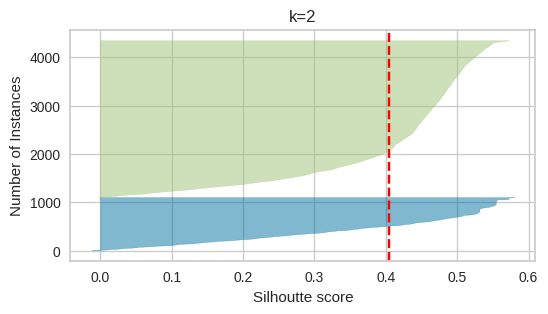

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


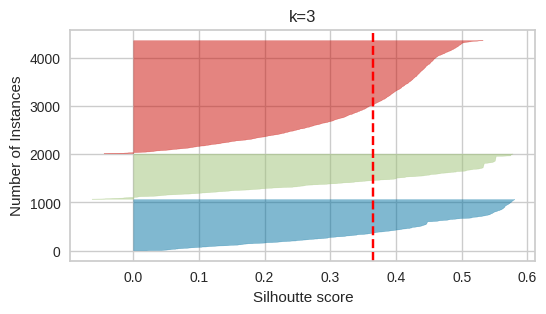

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


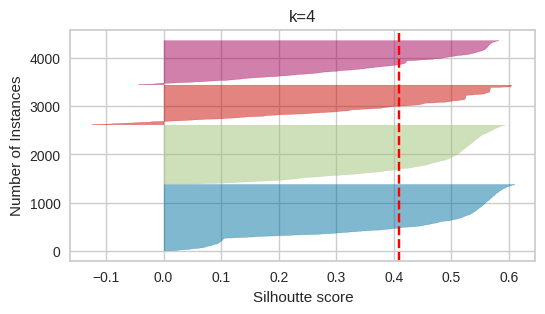

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


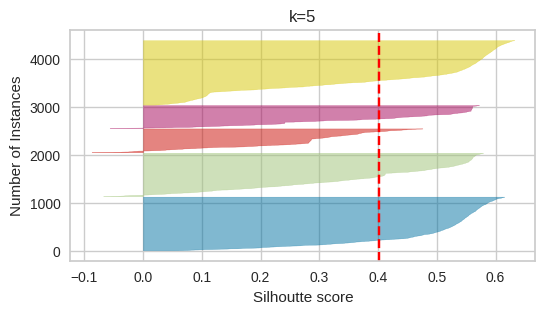

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


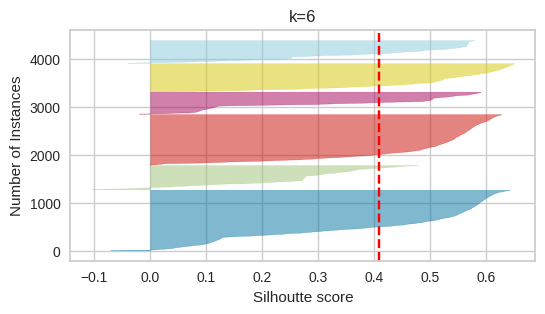

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


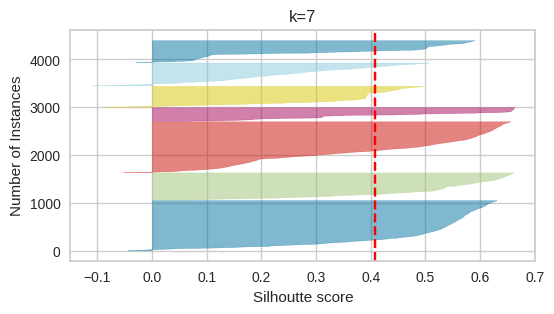

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


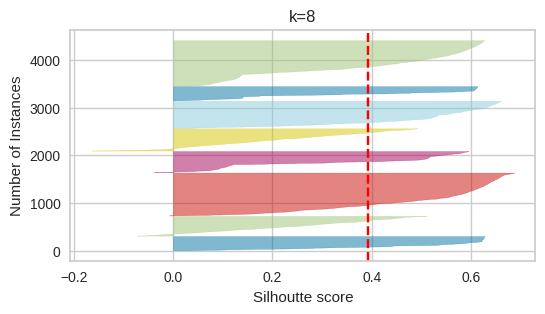

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


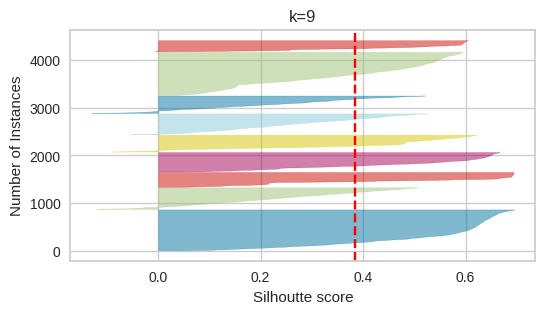

In [120]:
# Plot Silhouette Diagram
from yellowbrick.cluster import SilhouetteVisualizer # Import the class from the yellowbrick library

clusters = np.arange(2,10)
for c in clusters:
    plt.figure(figsize=(6, 3))
    # Instantiate the clustering model and visualizer
    data_with_clusters, centroids, kmeans_model = apply_kmeans(temp_numeric_features, c)

    # Instantiate SilhouetteVisualizer()
    visualizer = SilhouetteVisualizer(kmeans_model, colors='yellowbrick')
    # Fit the data to the visualizer
    visualizer.fit(temp_numeric_features);
    plt.title("k={}".format(c))
    plt.xlabel("Silhoutte score")
    plt.ylabel("Number of Instances")
    plt.show()

#### Applying k means with k = 5 clusters

In [121]:
k = 5
data_with_clusters, centroids, kmeans_model_features = apply_kmeans(temp_numeric_features, k)
kmeans_model_features.cluster_centers_

#Final Model

temp_numeric_features["Cluster"] = kmeans_model_features.labels_

<ipython-input-121-1d72c4a68d2b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_numeric_features["Cluster"] = kmeans_model_features.labels_


In [122]:
temp_numeric_features

Recency  Frequency  MonetaryValue  Buyer_Type  Cluster
0     2.402534  -0.813553      -0.979486           3        1
1    -0.919182   1.168810       2.222215           3        2
2    -0.170771   0.177629      -0.484484           3        4
3    -0.744895  -0.813553       0.333257           1        0
4     2.238499  -0.813553      -0.689216           3        1
...        ...        ...            ...         ...      ...
4327  1.910428  -0.813553      -0.819898           3        1
4328  0.915963  -0.813553      -0.942602           3        1
4329 -0.857669  -0.483159      -0.860269           3        4
4330 -0.898678   2.490384       1.089199           1        3
4331 -0.498841  -0.152765       0.616442           1        0

[4332 rows x 5 columns]

In [123]:
temp_numeric_features.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Buyer_Type':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)

Recency Frequency Buyer_Type MonetaryValue      
           mean      mean       mean          mean count
Cluster                                                 
0         -0.35     -0.33       1.00         -0.35  1116
1          1.71     -0.69       2.34         -0.67   904
2         -0.62      1.35       2.91          1.42   496
3         -0.72      1.72       1.13          1.77   475
4         -0.37     -0.37       2.82         -0.41  1341

#### Plotting the clusters for every attribute with respect to the corresponding value

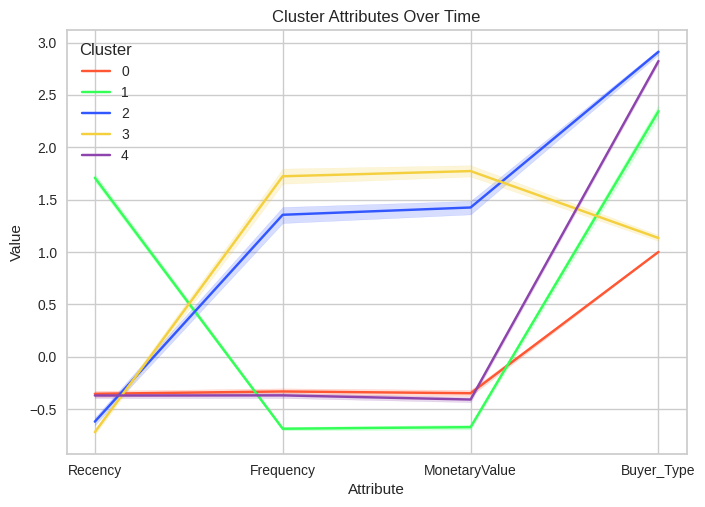

In [124]:
df_normalized = pd.DataFrame(temp_numeric_features, columns=['Recency', 'Frequency', 'MonetaryValue','Buyer_Type'])
df_normalized['ID'] = temp_numeric_features.index
df_normalized['Cluster'] = kmeans_model_features.labels_
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency', 'Frequency', 'MonetaryValue','Buyer_Type'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()
# Visualize it
custom_palette = ['#FF5733', '#33FF57', '#3357FF', '#F4D03F', '#8E44AD']
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=df_nor_melt,palette = custom_palette)
plt.title('Cluster Attributes Over Time')
plt.show()

#### 2d data plotting

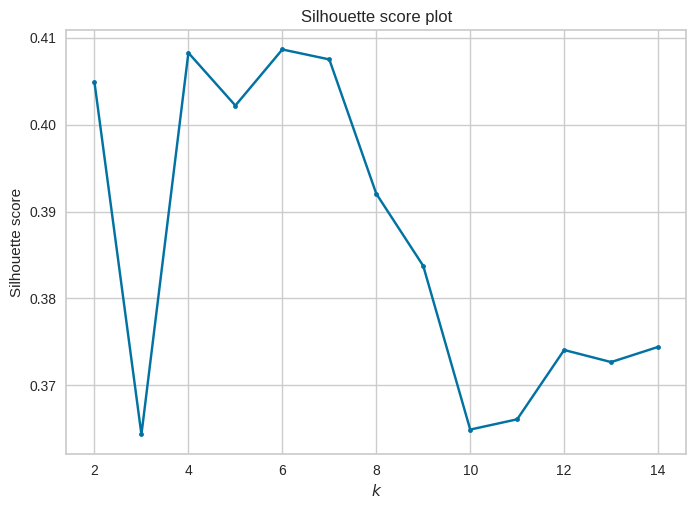

In [125]:
# Plot Silhouette score plot
temp_numeric_features = scaled_data_dataframe[['Recency', 'Frequency', 'MonetaryValue','Buyer_Type']]

clusters = np.arange(2,15)
sil_score = []
for c in clusters:
    data_with_clusters, centroids, kmeans_model = apply_kmeans(temp_numeric_features, c)
    sil_score.append(silhouette_score(temp_numeric_features, kmeans_model.labels_))

plt.plot(clusters, sil_score, marker= '.')
plt.title('Silhouette score plot')
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.show()

In [126]:
!pip install kneed

#### To choose the appropriate epsilon value for DBSCAN algo

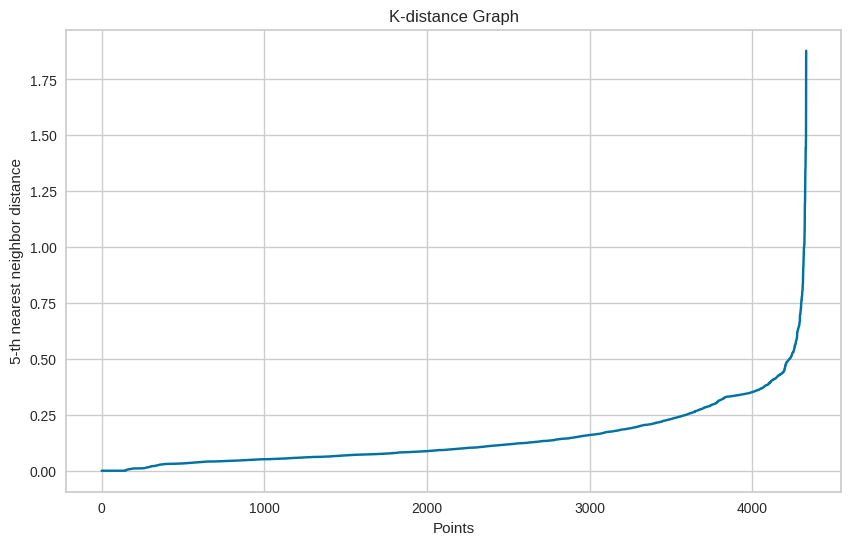

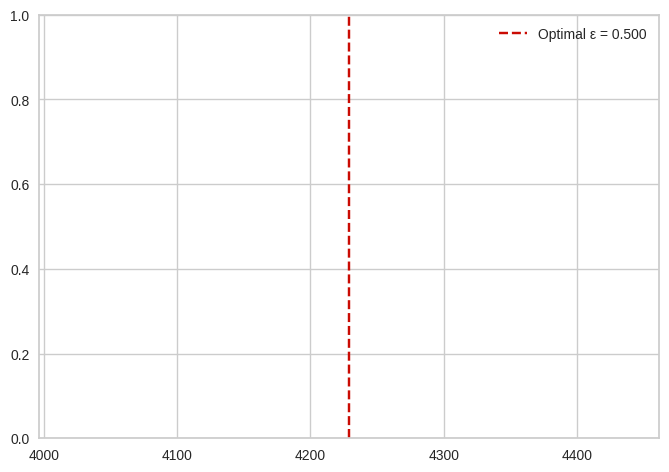

In [127]:
# Function to plot k-distance graph
from sklearn.neighbors import NearestNeighbors # Import NearestNeighbors
from kneed import KneeLocator

# Function to plot k-distance graph
def plot_k_distance_graph(X, k):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X)
    distances, _ = neigh.kneighbors(X)
    distances = np.sort(distances[:, k-1])
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel(f'{k}-th nearest neighbor distance')
    plt.title('K-distance Graph')
    plt.show()

    knee = KneeLocator(range(len(distances)), distances, curve='convex', direction='increasing')
    epsilon = distances[knee.knee]

    # Mark the optimal epsilon on the graph
    plt.axvline(x=knee.knee, color='r', linestyle='--', label=f'Optimal ε = {epsilon:.3f}')
    plt.legend()
    plt.show()

    return epsilon
# Plot k-distance graph
epsilon = plot_k_distance_graph(temp_numeric_features, k=5)

#### Applying the DBSCAN algorithm

In [128]:
# Apply DBSCAN on scaled numeric features
dbscan_test_data, dbscan_model = apply_dbscan(temp_numeric_features, eps=0.5, min_samples=75)

# Display the dataset with DBSCAN cluster labels
dbscan_test_data.head()
print("Unique clusters in data: ", np.unique(dbscan_model.labels_))

Unique clusters in data:  [-1  0  1  2  3  4]


In [129]:
# Number of core instances their indices and position
num_of_core_instns = len(dbscan_model.core_sample_indices_)
print("Number of core instances: ", num_of_core_instns)

# the indices of the 10 core instances
core_instns_indices = dbscan_model.core_sample_indices_
print("First 10 core instances indices: ", core_instns_indices[0:10])

# the vectors of all the 10 core instances
core_instns = dbscan_model.components_
print("First 10 core instances: \n", core_instns[0:10])

Number of core instances:  2767
First 10 core instances indices:  [ 0  4  6  8 11 14 15 16 17 18]
First 10 core instances: 
 [[ 2.40253391 -0.81355254 -0.97948562  3.        ]
 [ 2.23849855 -0.81355254 -0.68921588  3.        ]
 [ 1.15176431 -0.81355254 -0.97815591  1.        ]
 [ 1.2542864  -0.81355254 -0.75128731  1.        ]
 [-0.91918209 -0.48315884 -0.16436084  3.        ]
 [ 2.00269772 -0.81355254 -0.81946233  3.        ]
 [-0.90892988  2.15999078  2.22221458  3.        ]
 [ 0.18805658 -0.48315884 -0.41678827  1.        ]
 [-0.85766883  0.17762856  0.20734835  3.        ]
 [ 2.04370656 -0.81355254 -0.68812595  3.        ]]


#### Fitting the model using dbscan_model

In [130]:
# Fit DBSCAN model to the data and predict cluster labels
dbscan_labels = dbscan_model.fit_predict(temp_numeric_features)

In [131]:
temp_numeric_features["Cluster"] = dbscan_labels

# Calculate Silhouette score
silhouette_score_dbscan = silhouette_score(temp_numeric_features, dbscan_labels)

# Print and save the results
print("Silhouette Score by Considering Outliers:", silhouette_score_dbscan)

<ipython-input-131-b313bd29b2be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_numeric_features["Cluster"] = dbscan_labels


Silhouette Score by Considering Outliers: 0.4256208277802104


In [132]:
# filtering out the non outlier data
non_outlier_mask = (dbscan_labels != -1)
non_outlier_data = temp_numeric_features[non_outlier_mask]
non_outlier_labels = dbscan_labels[non_outlier_mask]
non_outlier_labels

array([0, 0, 1, ..., 0, 0, 1])

In [133]:
# Compute silhouette score for non-outlier points
silhouette_score_dbscan = silhouette_score(non_outlier_data, non_outlier_labels)
print("Silhouette Score without Outliers:", silhouette_score_dbscan)

Silhouette Score without Outliers: 0.5218869881088963


#### Comparing cluster result between K-means clustering and DBSCAN

In [134]:
def compare_clustering_results(kmeans_data, dbscan_data):
    # Combine K-Means and DBSCAN results
    combined_data = kmeans_data.copy()
    combined_data['Cluster_DBSCAN'] = dbscan_data['Cluster_DBSCAN']

    # Plot K-Means results
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(combined_data['Recency'], combined_data['Frequency'],
                c=combined_data['Cluster'], cmap='viridis', s=50, label='K-Means')
    plt.title('K-Means Clustering')
    plt.xlabel('Recency')
    plt.ylabel('Frequency')
    plt.colorbar(label='Cluster')

    # Plot DBSCAN results
    plt.subplot(1, 2, 2)
    plt.scatter(combined_data['Recency'], combined_data['Frequency'],
                c=combined_data['Cluster_DBSCAN'], cmap='viridis', s=50, label='DBSCAN')
    plt.title('DBSCAN Clustering')
    plt.xlabel('Recency')
    plt.ylabel('Frequency')
    plt.colorbar(label='Cluster_DBSCAN')

    plt.tight_layout()
    plt.show()

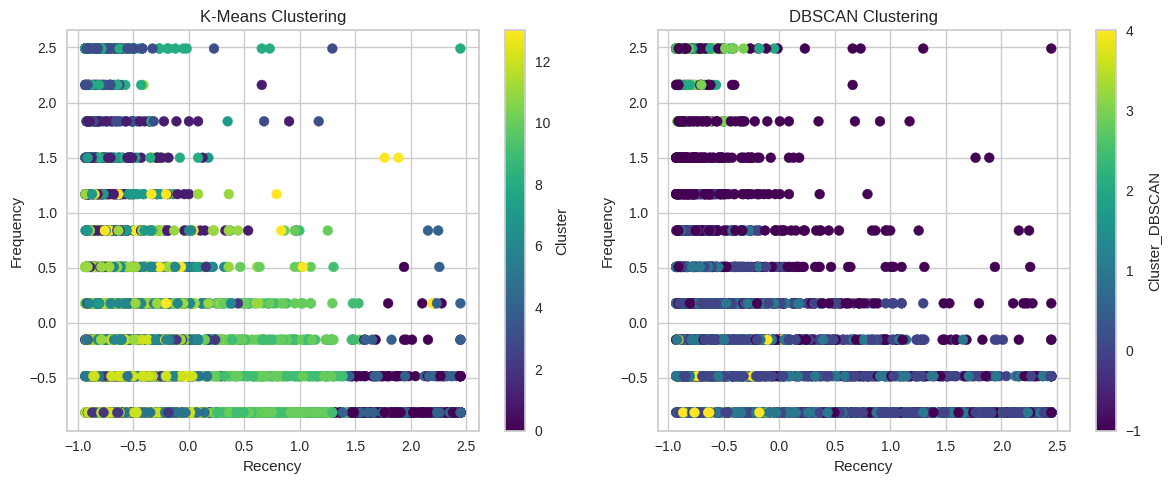

In [135]:
compare_clustering_results(data_with_clusters, dbscan_test_data)

#### Visualize 3d plot

In [137]:
def visualize_clusters_3d(data, cluster_centers, feature_x, feature_y, feature_z, cluster_column='Cluster'):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot for data points, color them by cluster
    for cluster in data[cluster_column].unique():
        cluster_data = data[data[cluster_column] == cluster]
        ax.scatter(
            cluster_data[feature_x],
            cluster_data[feature_y],
            cluster_data[feature_z],
            label=f'Cluster {cluster}',
            s=50

        )

    # Scatter plot for cluster centers
    ax.scatter(
        cluster_centers[:, 0],  # X-coordinates of centers
        cluster_centers[:, 1],  # Y-coordinates of centers
        cluster_centers[:, 2],  # Z-coordinates of centers
        c='red',
        marker='X',
        s=200,
        label='Cluster Centers'
    )

    # Labels and legend
    ax.set_title(f"3D Visualization of Clusters: {feature_x}, {feature_y}, {feature_z}")
    ax.set_xlabel(feature_x)
    ax.set_ylabel(feature_y)
    ax.set_zlabel(feature_z)
    ax.legend()

    plt.show()



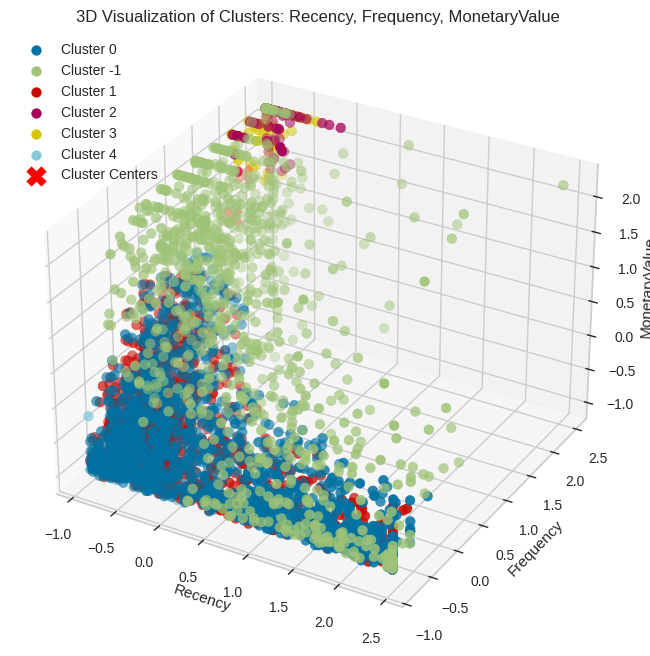

In [138]:
visualize_clusters_3d(
    data=temp_numeric_features, #data_with_clusters,
    cluster_centers=kmeans_model_features.cluster_centers_[:, [0, 1, 2]],  # Adjust based on feature indices
    feature_x='Recency',
    feature_y='Frequency',
    feature_z='MonetaryValue',
    cluster_column='Cluster'
)

In [139]:
#FINAL K-means Clusterin with K = 4 or 6
k = 5
data_with_clusters, centroids, kmeans_model_final = apply_kmeans(temp_numeric_features, k)

temp_numeric_features["Cluster"] = kmeans_model_final.labels_
kmeans_model_final.cluster_centers_

<ipython-input-139-9c088d5007b7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_numeric_features["Cluster"] = kmeans_model_final.labels_


array([[-0.37421462, -0.28384817, -0.33889983,  2.95365854, -0.08373984],
       [-0.54625602,  1.1022341 ,  1.34208461,  1.95789474, -0.96090226],
       [-0.3774656 , -0.39227384, -0.41740553,  1.12297735,  1.36893204],
       [ 1.69676065, -0.68402943, -0.66560331,  2.35326689, -0.02214839],
       [-0.81235956,  2.41166652,  2.15205889,  1.8590604 ,  2.5704698 ]])

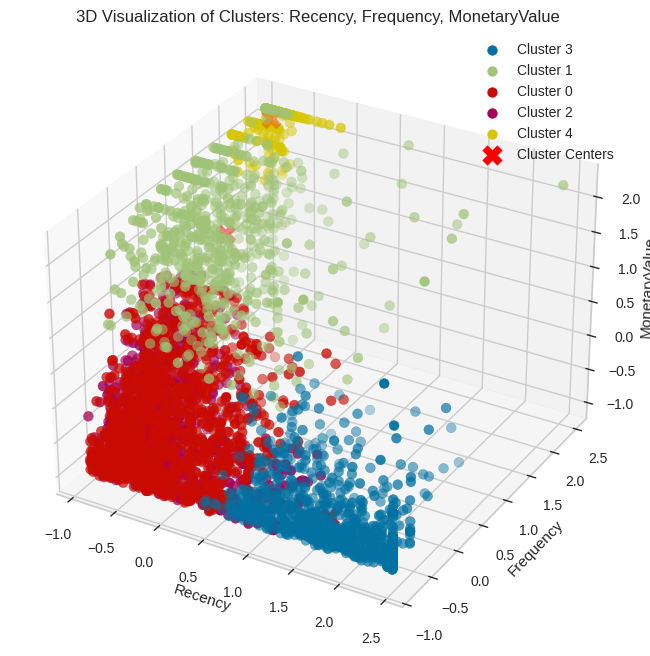

In [140]:
# DB-SCAN : Considering three features, e.g., 'Recency', 'Frequency', and 'MonetaryValue'
visualize_clusters_3d(
    data= data_with_clusters,
    cluster_centers=kmeans_model_final.cluster_centers_[:, [0, 1, 2]],  # Adjust based on feature indices
    feature_x='Recency',
    feature_y='Frequency',
    feature_z='MonetaryValue',
    cluster_column='Cluster'
)

#### Hierarchial Clustering

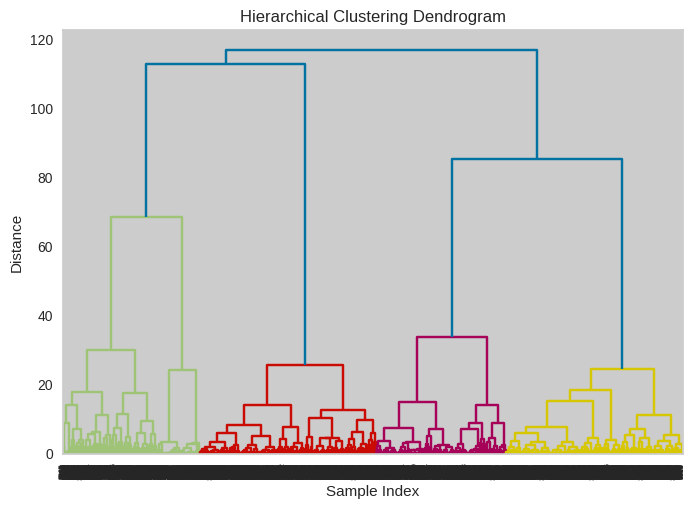

In [141]:
# Sample code using SciPy for hierarchical clustering and dendrogram visualization
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data
X = temp_numeric_features

# Perform hierarchical clustering
linked = linkage(X, 'ward')

# Plot the dendrogram
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Radar chart per cluster

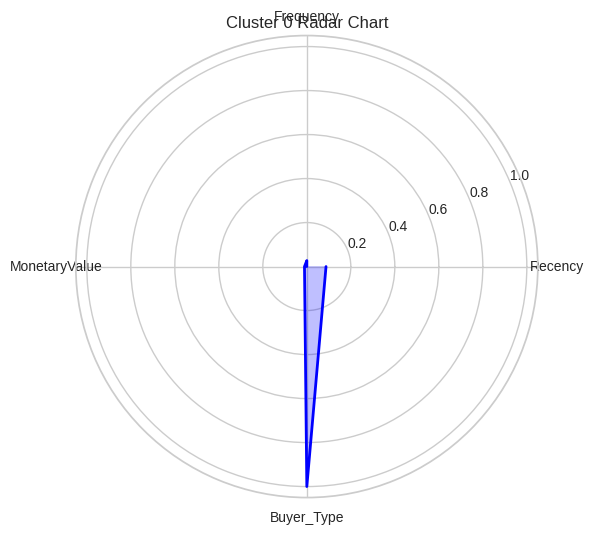

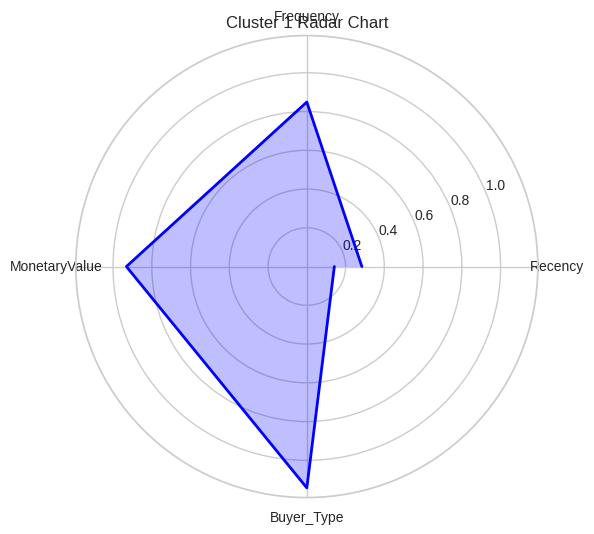

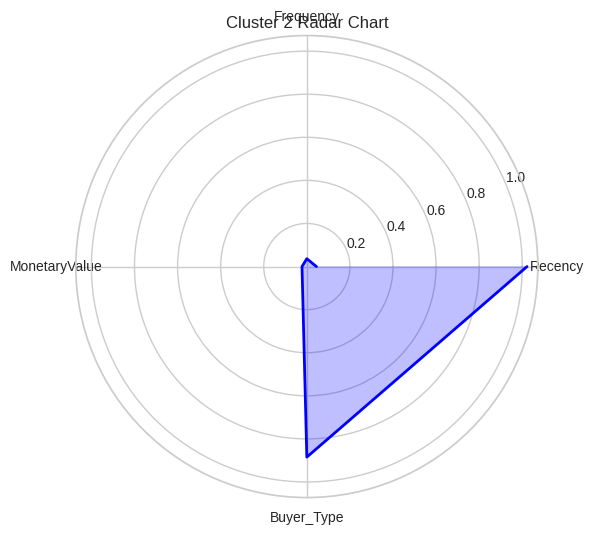

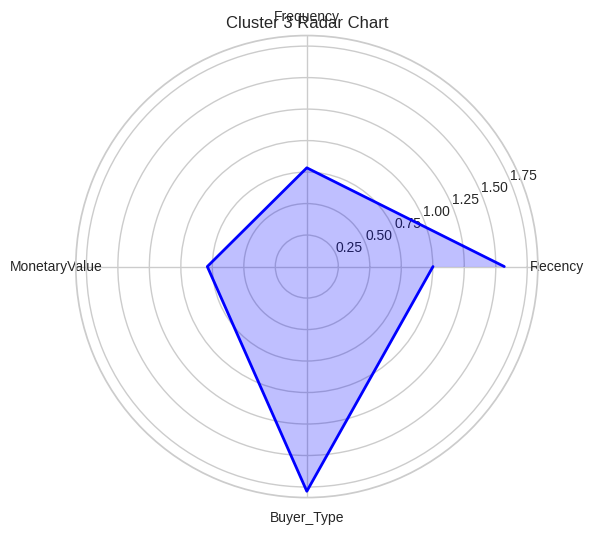

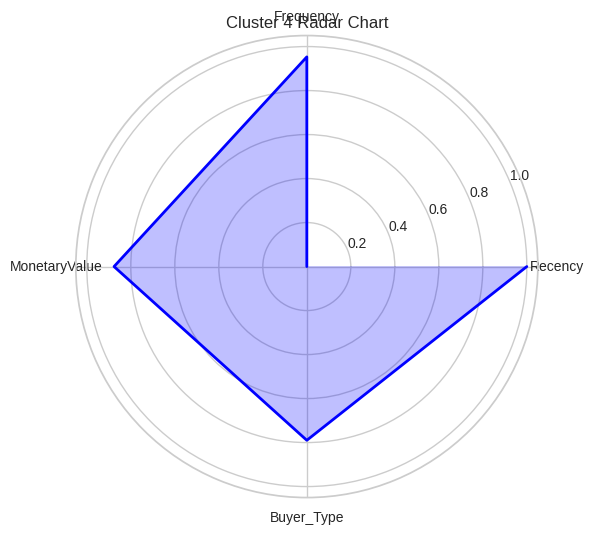

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def plot_radar_chart_per_cluster(data, centroids, cluster_labels, cluster_column='Cluster'):
    """Plots a radar chart for each cluster separately.

    Args:
        data: DataFrame containing the data.
        centroids: Cluster centroids.
        cluster_labels: Cluster labels for each data point.
        cluster_column: Name of the column containing cluster labels. Defaults to 'Cluster'.
    """

    # Get unique cluster labels
    unique_clusters = np.unique(cluster_labels)

    # Create radar charts for each cluster
    for cluster in unique_clusters:
        # Filter data for the current cluster
        cluster_data = data[data[cluster_column] == cluster]

        # Get centroid for the current cluster
        centroid = centroids[cluster]

        # Select relevant features for the radar chart
        features = ['Recency', 'Frequency', 'MonetaryValue','Buyer_Type']
        values = centroid

        # Scale values to a range between 0 and 1 for better visualization
        scaler = MinMaxScaler()
        values_scaled = scaler.fit_transform(values.reshape(-1, 1)).flatten()

        # Number of features
        num_features = len(features)

        # Create angles for the radar chart
        angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
        angles += angles[:1]  # Close the circle

        # Create the radar chart
        fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
        ax.plot(angles, values_scaled + values_scaled[:1], color='blue', linewidth=2)
        ax.fill(angles, values_scaled + values_scaled[:1], color='blue', alpha=0.25)
        ax.set_thetagrids(np.degrees(angles[:-1]), features)
        ax.set_title(f'Cluster {cluster} Radar Chart')
        ax.grid(True)
        plt.show()

# Assuming 'data_with_clusters', 'centroids', and 'kmeans_model' are defined from your previous code
# Replace 'kmeans_model.labels_' with your cluster labels if they are stored differently
plot_radar_chart_per_cluster(data_with_clusters, kmeans_model_final.cluster_centers_, kmeans_model_final.labels_)

<Axes: xlabel='Cluster', ylabel='MonetaryValue'>

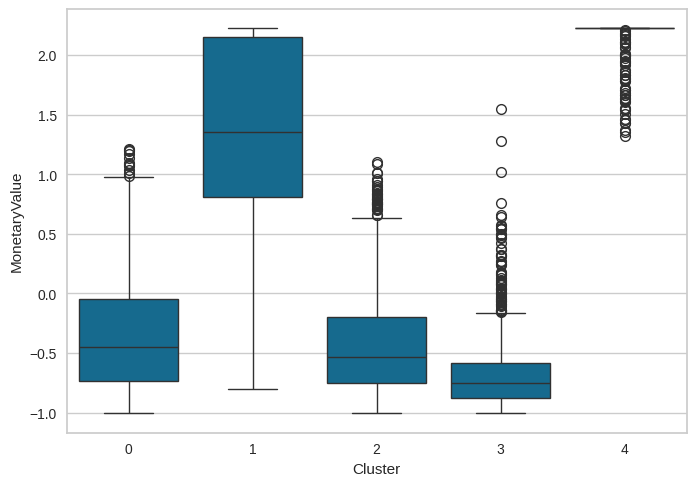

In [143]:
sns.boxplot(x='Cluster',y='MonetaryValue',data=temp_numeric_features)

<Axes: xlabel='Cluster', ylabel='Buyer_Type'>

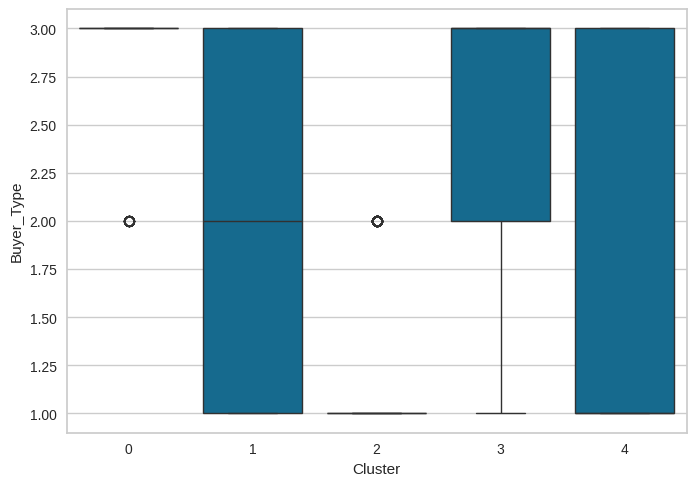

In [147]:
sns.boxplot(x='Cluster',y='Buyer_Type',data=temp_numeric_features)

<Axes: xlabel='Cluster', ylabel='Frequency'>

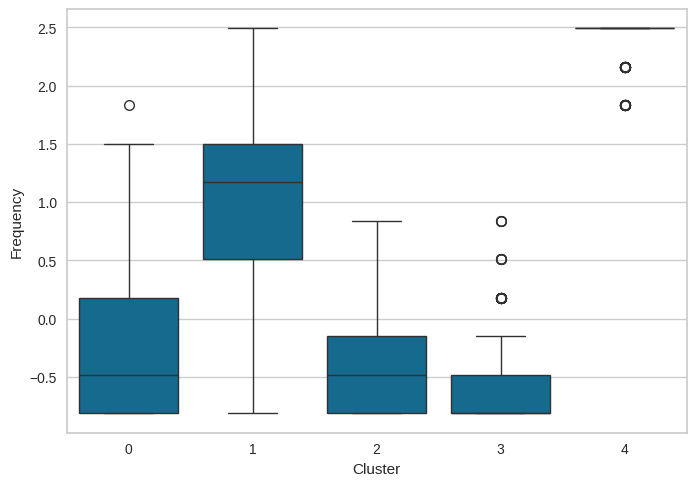

In [148]:
sns.boxplot(x='Cluster',y='Frequency',data=temp_numeric_features)

In [144]:
temp_numeric_features.head(2)

Recency  Frequency  MonetaryValue  Buyer_Type  Cluster
0  2.402534  -0.813553      -0.979486           3        3
1 -0.919182   1.168810       2.222215           3        1

#### Agglomerative Clustering

In [149]:
# Exploring HAC - heirarchical clustering

from sklearn.cluster import AgglomerativeClustering

k = 5
hac_model = AgglomerativeClustering(n_clusters=k).fit(temp_numeric_features)

#Final Model

temp_numeric_features["Cluster"] = hac_model.labels_

<ipython-input-149-91ae254786b7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_numeric_features["Cluster"] = hac_model.labels_


<Axes: xlabel='Cluster', ylabel='MonetaryValue'>

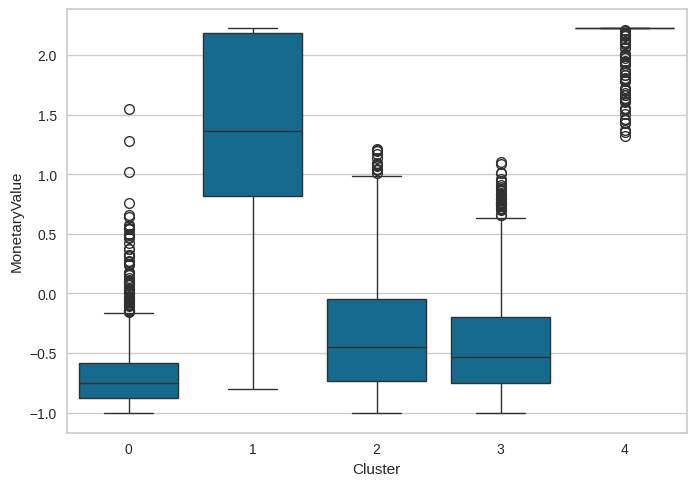

In [150]:
sns.boxplot(x='Cluster',y='MonetaryValue',data=temp_numeric_features)

<Axes: xlabel='Cluster', ylabel='Buyer_Type'>

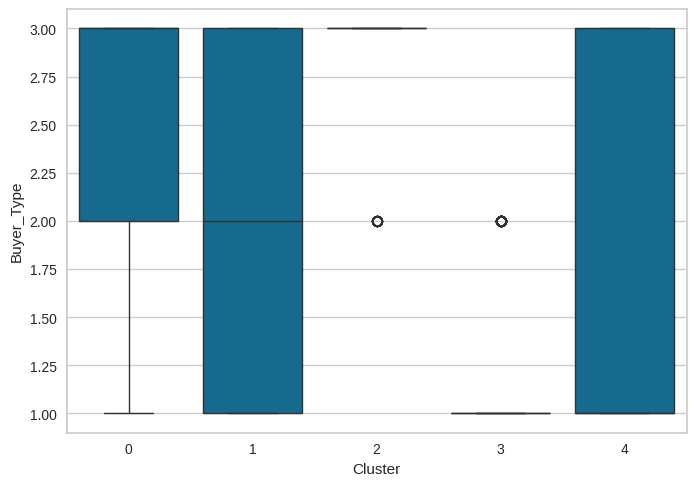

In [151]:
sns.boxplot(x='Cluster',y='Buyer_Type',data=temp_numeric_features)

<Axes: xlabel='Cluster', ylabel='Recency'>

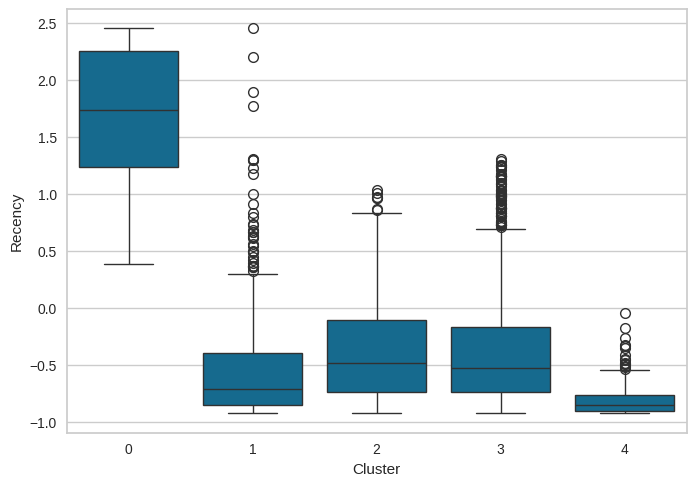

In [152]:
sns.boxplot(x='Cluster',y='Recency',data=temp_numeric_features)

In [155]:
temp_numeric_features.shape

(4332, 5)

In [157]:
temp_numeric_features.head(2)

Recency  Frequency  MonetaryValue  Buyer_Type  Cluster
0  2.402534  -0.813553      -0.979486           3        0
1 -0.919182   1.168810       2.222215           3        1

In [158]:
X = temp_numeric_features.drop(['Cluster'], axis=1)
y = temp_numeric_features['Cluster']

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [160]:
!pip -qq install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.4 MB/s eta 0:00:00


#### Training a Supervised Learning Alogirthm

In [161]:
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, f1_score, roc_curve, log_loss
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, metrics

vannila_catboost_params = {"iterations": 1000, "learning_rate": 0.05}
catboost_clf = CatBoostClassifier(iterations=vannila_catboost_params["iterations"],
                                  learning_rate=vannila_catboost_params["learning_rate"],
                                  loss_function='MultiClass'
                                  )
catboost_clf.fit(X_train, y_train,
                 eval_set = (X_test, y_test),
                 verbose = False)

In [162]:
def k_fold_validation(model, X, y, k=10):
    #Validing best result of Random Forrest with K-fold for overfitting
    from sklearn.model_selection import KFold, cross_val_score
    # model=RandomForestClassifier()
    kfold_validation=KFold(k)

    # Displaying the cross validation score
    results=cross_val_score(model,X,y,cv=kfold_validation)
    return results

    # Function to plot ROC AUC curve for any model
def plot_roc_auc_for_attrition(model, X_train, y_train, X_test, y_test):
    labels = model.predict(X_test)
    model_roc_auc = roc_auc_score(y_test, labels)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='(area = %0.2f)' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.legend(loc="lower right")
    plt.savefig('ROC')
    plt.show()

In [163]:
# YOUR CODE HERE
def catboost_report(model, X_test, y_test):
    from sklearn.metrics import classification_report
    cbr_prediction = model.predict(X_test)
    print('Accuracy Score: ', accuracy_score(y_test, cbr_prediction))

    y_pred_prob = model.predict_proba(X_test)
    print(f'Log Loss: {log_loss(y_test, y_pred_prob)}')

    print(f'Classification Report for {model.__class__.__name__}:')
    print(classification_report(y_test, cbr_prediction))

In [164]:
catboost_report(catboost_clf, X_test, y_test)

Accuracy Score:  0.9896193771626297
Log Loss: 0.035480140787175214
Classification Report for CatBoostClassifier:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       193
           1       1.00      0.98      0.99       136
           2       0.99      0.98      0.99       231
           3       0.99      1.00      0.99       242
           4       1.00      1.00      1.00        65

    accuracy                           0.99       867
   macro avg       0.99      0.99      0.99       867
weighted avg       0.99      0.99      0.99       867

